In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sabdab_summary_all.tsv', sep='\t', header=0)[['pdb', 'antigen_type', 'antigen_name', 'compound', 'organism']]

In [3]:
print("Initial number of rows: " + str(len(df)))

Initial number of rows: 13431


In [4]:
# First we drop rows that are exactly the same (corresponding to same structure but different Hchain and Lchain)
df.drop_duplicates(keep='first', inplace=True)

In [5]:
# and also those correspoding to antibodies that do not bind to any antigen
df = df[(df.antigen_type.notna()) & (df.antigen_type != 'NA')]

In [6]:
df_g = df[['pdb', 'antigen_type']] # general statistics DataFrame

# 1. General statistics 

In [7]:
df_g

,pdb,antigen_type
0,7t17,protein
2,6fe4,protein
3,7jmo,protein
4,7sgf,protein | protein
5,6ch9,protein
...,...,...
13414,6t3f,protein
13415,4od2,protein
13416,7e14,protein | protein
13418,5yax,peptide


In [8]:
print("Number of antibody/antigen pairs (at first sight): " + str(len(df_g)))

Number of antibody/antigen pairs (at first sight): 5547


In [9]:
print("Number of antibodies that bind only to one antigen (at first sight): " + str(len(df_g.drop_duplicates(['pdb'], keep=False)))) 
print("Number of structures with antigen: " + str(len(df_g.drop_duplicates(['pdb'], keep='first'))))

Number of antibodies that bind only to one antigen (at first sight): 5041
Number of structures with antigen: 5279


In [10]:
#List of duplicates 
df_g['pdb'][df_g['pdb'].duplicated()].sort_values(ascending=True).drop_duplicates(keep='first')

9204     1i8m
2009     1ken
9134     1qfw
7826     1xcq
11136    1xf5
         ... 
4795     7wuj
12931    7x3c
10418    7xw6
2978     7z3a
1321     7zlk
Name: pdb, Length: 238, dtype: object

In [11]:
# 213 antibodies are only repeated once, 20 twice and 5 three times
df_g['pdb'][df_g['pdb'].duplicated()].sort_values(ascending=True).value_counts().value_counts()

1    213
2     20
3      5
Name: pdb, dtype: int64

In [12]:
# For example 7z3a is promiscuous
df[df_g['pdb']=='7z3a']

,pdb,antigen_type,antigen_name,compound,organism
431,7z3a,protein,amc009 sosipv5.2 envelope glycoprotein gp120,AMC009 SOSIPv5.2 in complex with Fabs ACS101 a...,Homo sapiens; Human immunodeficiency virus 1
2978,7z3a,protein,amc009 sosip.v5.2 envelope glycoprotein gp41,AMC009 SOSIPv5.2 in complex with Fabs ACS101 a...,Homo sapiens; Human immunodeficiency virus 1


In [13]:
# 7xw6 too
df[df_g['pdb']=='7xw6']

,pdb,antigen_type,antigen_name,compound,organism
6163,7xw6,protein | protein,guanine nucleotide-binding protein g(s) subuni...,TSHR-Gs-M22 antibody-ML109 complex,Homo sapiens; Mus musculus
10418,7xw6,protein,thyrotropin receptor,TSHR-Gs-M22 antibody-ML109 complex,Homo sapiens; Mus musculus


In [14]:
# Showing antigen types different to 'protein', 'carbohydrate', 'nucleic-acid', 'Hapten' and 'peptide'
second_it_promiscuous = df[~df_g['antigen_type'].isin(['protein', 'carbohydrate', 'nucleic-acid', 'Hapten', 'peptide', 'unknown'])]
second_it_promiscuous['antigen_type'].value_counts()

protein | protein                                  697
protein | protein | protein                        131
protein | peptide                                   25
peptide | protein                                    9
protein | protein | peptide                          8
peptide | peptide                                    7
protein | protein | protein | protein                5
nucleic-acid | nucleic-acid                          3
peptide | protein | protein                          3
carbohydrate | protein | protein                     3
peptide | peptide | peptide                          2
carbohydrate | protein                               2
protein | protein | protein | protein | protein      2
protein | peptide | protein                          2
protein | nucleic-acid                               1
protein | protein | protein | peptide                1
nucleic-acid | nucleic-acid | nucleic-acid           1
Name: antigen_type, dtype: int64

In [15]:
print("Number of antibodies that bind only to one antigen (at second sight): " + str(len(df_g.drop_duplicates(['pdb'], keep=False)) - second_it_promiscuous['antigen_type'].value_counts().sum()))

Number of antibodies that bind only to one antigen (at second sight): 4139


In [16]:
# Number of equal antigens for a single antibody 
putative_promiscuous = second_it_promiscuous['antigen_name'].to_frame()['antigen_name'].str.split('|', expand=True)
putative_promiscuous

,0,1,2,3,4
4,gpc-i53-50a,unknown,None,None,None
13,envelope glycoprotein gp120,envelope glycoprotein gp41,None,None,None
21,guanine nucleotide-binding protein g(i) subuni...,guanine nucleotide-binding protein g(i)/g(s)/...,None,None,None
24,"designed influenza hemagglutinin stem #4454, ha2","designed influenza hemagglutinin stem #4454, ha1",None,None,None
49,hemagglutinin ha2 chain,hemagglutinin ha1 chain,None,None,None
...,...,...,...,...,...
13336,guanine nucleotide-binding protein g(s) subuni...,guanine nucleotide-binding protein g(i)/g(s)/...,None,None,None
13343,guanine nucleotide-binding protein g(i) subuni...,guanine nucleotide-binding protein g(i)/g(s)/...,guanine nucleotide-binding protein g(t) subun...,None,None
13381,ic3b1 beta chain,ic3b1 alpha chain,None,None,None
13383,pertussis like toxin subunit b,pertussis like toxin subunit b,pertussis toxin-like subunit arta,None,None


In [17]:
# Some more antibodies that bind only to one antigen
putative_promiscuous['Possible antigens'] = putative_promiscuous.apply(lambda x: x.dropna().count(), axis=1)
putative_promiscuous['Equal'] = putative_promiscuous.apply(lambda x: x.dropna().str.strip().duplicated(keep=False).sum(), axis=1)
putative_promiscuous['Difference'] = putative_promiscuous['Possible antigens'] - putative_promiscuous['Equal']
only_one_antigen = (putative_promiscuous['Difference'].sort_values() == 0).sum()
putative_promiscuous

,0,1,2,3,4,Possible antigens,Equal,Difference
4,gpc-i53-50a,unknown,None,None,None,2,0,2
13,envelope glycoprotein gp120,envelope glycoprotein gp41,None,None,None,2,0,2
21,guanine nucleotide-binding protein g(i) subuni...,guanine nucleotide-binding protein g(i)/g(s)/...,None,None,None,2,0,2
24,"designed influenza hemagglutinin stem #4454, ha2","designed influenza hemagglutinin stem #4454, ha1",None,None,None,2,0,2
49,hemagglutinin ha2 chain,hemagglutinin ha1 chain,None,None,None,2,0,2
...,...,...,...,...,...,...,...,...
13336,guanine nucleotide-binding protein g(s) subuni...,guanine nucleotide-binding protein g(i)/g(s)/...,None,None,None,2,0,2
13343,guanine nucleotide-binding protein g(i) subuni...,guanine nucleotide-binding protein g(i)/g(s)/...,guanine nucleotide-binding protein g(t) subun...,None,None,3,0,3
13381,ic3b1 beta chain,ic3b1 alpha chain,None,None,None,2,0,2
13383,pertussis like toxin subunit b,pertussis like toxin subunit b,pertussis toxin-like subunit arta,None,None,3,2,1


In [18]:
only_one_antigen

189

In [19]:
print("Number of antibodies that bind only to one antigen: " + str(len(df_g.drop_duplicates(['pdb'], keep=False)) + only_one_antigen - second_it_promiscuous['antigen_type'].value_counts().sum()))

Number of antibodies that bind only to one antigen: 4328


In [20]:
# Antigen-antibody complexes in the |-separated part

pipe_new_complexes = putative_promiscuous.apply(lambda x: x.dropna().str.strip().duplicated(keep='first').sum(), axis=1).sum()
pipe_new_complexes

2042

In [21]:
print("Number of antibody/antigen pairs: " + str(len(df_g) - second_it_promiscuous['antigen_type'].value_counts().sum() + pipe_new_complexes))

Number of antibody/antigen pairs: 6687


# 2. Particular targets

### 2.1. Alzheimer's disease

In [22]:
df[df.apply(lambda x: x.astype('string').str.contains('amyloid|abeta|alzheimer|dementia', case=False).any(), axis=1)].sort_values('pdb').drop_duplicates(['pdb'])

,pdb,antigen_type,antigen_name,compound,organism
2164,2ipu,peptide,abeta 1-8 peptide,PFA1 Fab fragment complexed with Abeta 1-8 pep...,MUS MUSCULUS; SYNTHETIC CONSTRUCT
5513,2r0w,peptide,amyloid beta peptide fragment,PFA2 FAB complexed with Abeta1-8,MUS MUSCULUS; SYNTHETIC CONSTRUCT
334,2x89,protein,beta-2-microglobulin,Structure of the Beta2_microglobulin involved ...,HOMO SAPIENS; CAMELUS DROMEDARIUS
3649,3bae,peptide,amyloid beta peptide,Crystal structure of Fab WO2 bound to the N te...,MUS MUSCULUS; SYNTHETIC CONSTRUCT
8380,3bkj,peptide,amyloid beta peptide,Crystal structure of Fab wo2 bound to the n te...,MUS MUSCULUS; SYNTHETIC CONSTRUCT
4423,3ifl,peptide,amyloid beta a4 protein,X-ray structure of amyloid beta peptide:antibo...,MUS MUSCULUS; SYNTHETIC CONSTRUCT
1161,3ifn,peptide,amyloid beta a4 protein,X-ray structure of amyloid beta peptide:antibo...,MUS MUSCULUS; SYNTHETIC CONSTRUCT
6350,3ifo,peptide,amyloid beta a4 protein,X-ray structure of amyloid beta peptide:antibo...,MUS MUSCULUS; SYNTHETIC CONSTRUCT
418,3ifp,peptide,amyloid beta a4 protein,X-ray structure of amyloid beta peptide:antibo...,MUS MUSCULUS; SYNTHETIC CONSTRUCT
8756,3u0t,peptide,amyloid beta a4 protein,Fab-antibody complex,HOMO SAPIENS; SYNTHETIC CONSTRUCT


In [23]:
df_alzh = df[df['pdb'] == '4f37']
df_alzh

,pdb,antigen_type,antigen_name,compound,organism
9734,4f37,protein,colicin-e7 immunity protein,Structure of the tethered N-terminus of Alzhei...,MUS MUSCULUS; ESCHERICHIA COLI


### 2.2. Influenza

In [24]:
df[df.apply(lambda x: x.astype('string').str.contains('influenza', case=False).any(), axis=1)].sort_values('pdb').drop_duplicates(['pdb'])

,pdb,antigen_type,antigen_name,compound,organism
13072,1a14,protein,neuraminidase,COMPLEX BETWEEN NC10 ANTI-INFLUENZA VIRUS NEUR...,MUS MUSCULUS; INFLUENZA A VIRUS
13397,1eo8,protein,hemagglutinin (ha1 chain),INFLUENZA VIRUS HEMAGGLUTININ COMPLEXED WITH A...,INFLUENZA A VIRUS (A/X-31(H3N2)); MUS MUSCULUS
4262,1frg,peptide,influenza hemagglutinin ha1 (strain x47)(resid...,"CRYSTAL STRUCTURE, SEQUENCE, AND EPITOPE MAPPI...",MUS MUSCULUS
7450,1him,peptide,influenza hemagglutinin ha1 (strain x47)(resid...,STRUCTURAL EVIDENCE FOR INDUCED FIT AS A MECHA...,MUS MUSCULUS
12420,1hin,peptide,influenza hemagglutinin ha1 (strain x47)(resid...,STRUCTURAL EVIDENCE FOR INDUCED FIT AS A MECHA...,MUS MUSCULUS
...,...,...,...,...,...
4347,7umm,protein,hemagglutinin,H1 Solomon Islands 2006 hemagglutinin in compl...,Influenza A virus (A/Solomon Islands/3/2006(H1...
9219,7x6l,protein | protein,hemagglutinin | hemagglutinin,Cryo-EM structure of H3 hemagglutinin from A/H...,HOMO SAPIENS; INFLUENZA A VIRUS (A/HONG KONG/1...
1973,7x6o,protein | protein,hemagglutinin | hemagglutinin,Cryo-EM structure of H1 hemagglutinin from A/W...,INFLUENZA A VIRUS; HOMO SAPIENS
392,7yhk,protein,hemagglutinin,Cryo-EM structure of the HA trimer of A/Beijin...,Influenza A virus (A/Beijing/262/1995(H1N1)); ...


### 2.3. Human immunodeficiency virus (HIV)

In [25]:
df[df.apply(lambda x: x.astype('string').str.contains('hiv|human immunodeficiency virus', case=False).any(), axis=1)].drop_duplicates(['pdb'])

,pdb,antigen_type,antigen_name,compound,organism
5,6ch9,protein,envelope glycoprotein gp120,Crystal structure of a natively-glycosylated B...,HUMAN IMMUNODEFICIENCY VIRUS 1; HOMO SAPIENS
13,7lg6,protein | protein,envelope glycoprotein gp120 | envelope glycopr...,BG505 SOSIP.v5.2 in complex with VRC40.01 and ...,HUMAN IMMUNODEFICIENCY VIRUS 1; HOMO SAPIENS; ...
26,2ny3,protein,envelope glycoprotein gp120,"HIV-1 gp120 Envelope Glycoprotein (K231C, T257...",HUMAN IMMUNODEFICIENCY VIRUS 1; HOMO SAPIENS
33,7ugq,protein,envelope glycoprotein gp120,Cryo-EM structure of BG24 Fabs with an inferre...,Homo sapiens; Human immunodeficiency virus 1
52,6mph,protein,envelope glycoprotein gp41,Cryo-EM structure at 3.8 A resolution of HIV-1...,MACACA MULATTA; HUMAN IMMUNODEFICIENCY VIRUS 1...
...,...,...,...,...,...
13217,4xvs,protein,donor 45 01dg5 coree gp120,Crystal structure of HIV-1 donor 45 d45-01dG5 ...,HUMAN IMMUNODEFICIENCY VIRUS 1; HOMO SAPIENS
13334,7t73,protein | protein | protein,hiv envelope apexgt2.2mut gp120 | hiv envelope...,HIV-1 Envelope ApexGT2.2MUT in complex with PC...,Homo sapiens; Human immunodeficiency virus 1
13357,3q1s,protein,interleukin-22,HIV-1 neutralizing antibody Z13e1 in complex w...,HOMO SAPIENS
13392,5sy8,protein,10e8 epitope scaffold t117v2,Crystal structure of the complex of 10E8 Fab l...,HOMO SAPIENS; SYNTHETIC CONSTRUCT


### 2.4. SARS-CoV-2

In [26]:
df[df.apply(lambda x: x.astype('string').str.contains('covid|sars-cov|corona', case=False).any(), axis=1)].drop_duplicates(['pdb'])

,pdb,antigen_type,antigen_name,compound,organism
3,7jmo,protein,spike protein s1,Crystal structure of SARS-CoV-2 receptor bindi...,SEVERE ACUTE RESPIRATORY SYNDROME CORONAVIRUS ...
8,7n0h,protein,spike glycoprotein,CryoEM structure of SARS-CoV-2 spike protein (...,SEVERE ACUTE RESPIRATORY SYNDROME CORONAVIRUS ...
9,7orb,protein,spike protein s1,Crystal structure of the L452R mutant receptor...,SEVERE ACUTE RESPIRATORY SYNDROME CORONAVIRUS ...
19,6zdh,protein,spike glycoprotein,SARS-CoV-2 Spike glycoprotein in complex with ...,SEVERE ACUTE RESPIRATORY SYNDROME CORONAVIRUS ...
23,7cwn,protein,spike glycoprotein,P17-H014 Fab cocktail in complex with SARS-CoV...,SEVERE ACUTE RESPIRATORY SYNDROME CORONAVIRUS ...
...,...,...,...,...,...
13245,7r7n,protein,spike glycoprotein,SARS-CoV-2 spike in complex with the S2D106 ne...,HOMO SAPIENS; SEVERE ACUTE RESPIRATORY SYNDROM...
13273,7l7d,protein,spike protein s1,Crystal structure of SARS-CoV-2 spike RBD in c...,HOMO SAPIENS; SEVERE ACUTE RESPIRATORY SYNDROM...
13339,7n3d,protein,nucleoprotein,Crystal Structure of Human Fab S24-1564 in the...,HOMO SAPIENS; SEVERE ACUTE RESPIRATORY SYNDROM...
13404,7fjc,protein,spike protein s1,Crystal structure of SARS-CoV-2 Beta RBD compl...,Homo sapiens; Severe acute respiratory syndrom...


### 2.5. Lysozyme

In [27]:
df[df.apply(lambda x: x.astype('string').str.contains('lysozyme', case=False).any(), axis=1)].drop_duplicates(['pdb'])

,pdb,antigen_type,antigen_name,compound,organism
47,4u3x,protein,lysozyme c,Structure of a human VH antibody domain bindin...,HOMO SAPIENS; GALLUS GALLUS
172,1vfb,protein,hen egg white lysozyme,BOUND WATER MOLECULES AND CONFORMATIONAL STABI...,MUS MUSCULUS; GALLUS GALLUS
400,1yqv,protein,hen egg white lysozyme,The crystal structure of the antibody Fab HyHE...,MUS MUSCULUS; GALLUS GALLUS
443,4n1e,protein,lysozyme c,Structural evidence for antigen receptor evolu...,HOMO SAPIENS; GALLUS GALLUS
525,1mel,protein,lysozyme,CRYSTAL STRUCTURE OF A CAMEL SINGLE-DOMAIN VH ...,CAMELUS DROMEDARIUS; GALLUS GALLUS
...,...,...,...,...,...
12942,1xgp,protein,lysozyme c,Structure for antibody HyHEL-63 Y33A mutant co...,MUS MUSCULUS; GALLUS GALLUS
12974,1uac,protein,lysozyme c,Crystal Structure of HYHEL-10 FV MUTANT SFSF C...,MUS MUSCULUS; MELEAGRIS GALLOPAVO
13103,1kip,protein,lysozyme,FV MUTANT Y(B 32)A (VH DOMAIN) OF MOUSE MONOCL...,MUS MUSCULUS; GALLUS GALLUS
13246,4ldl,protein,"lysozyme, beta-2 adrenergic receptor",Structure of beta2 adrenoceptor bound to hydro...,"LAMA GLAMA; ENTEROBACTERIA PHAGE T4, HOMO SAPIENS"


# 3. Modularity results

In [28]:
import matplotlib.pyplot as plt
import numpy as np

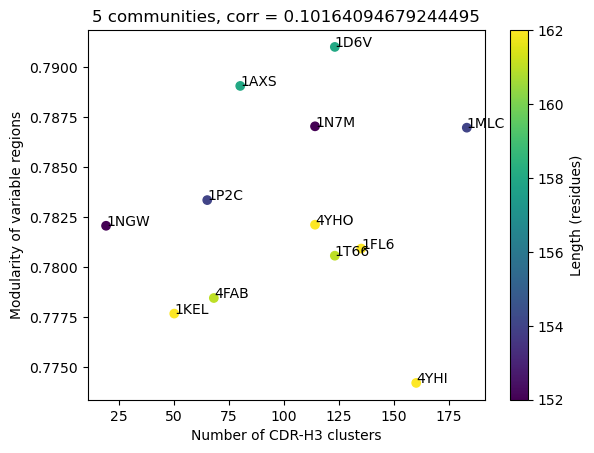

In [29]:
clusters = np.array([135, 50, 183, 65, 123, 80, 114, 19, 160, 114, 123, 68])
modularity_5 = np.array([0.7809155404343685, 0.7776635338586213, 0.7869587737479866, 0.7833383441000149, 0.790996326748399, 0.7890462237174074, 0.7870271497817197, 0.7820544954501715, 0.7741972204909877, 0.7821071389945145, 0.7805582598827464, 0.7784426895687988])
length = np.array([162, 162, 154, 154, 158, 158, 152, 152, 162, 162, 161, 161])
pdb = np.array(['1FL6', '1KEL', '1MLC', '1P2C', '1D6V', '1AXS', '1N7M', '1NGW', '4YHI', '4YHO', '1T66', '4FAB'])
corr_5_comm = np.corrcoef(clusters, modularity_5)[0, 1]

fig, ax = plt.subplots()

im = ax.scatter(clusters, modularity_5, c=length)

for i, txt in enumerate(pdb):
    ax.annotate(txt, (clusters[i], modularity_5[i]))
fig.colorbar(im, orientation='vertical', label='Length (residues)')
ax.set_xlabel('Number of CDR-H3 clusters')
ax.set_ylabel('Modularity of variable regions')
ax.set_title('5 communities, corr = ' + str(corr_5_comm))

plt.show()

# fl also 0.7809155404343685 and kel 0.7820453868837995

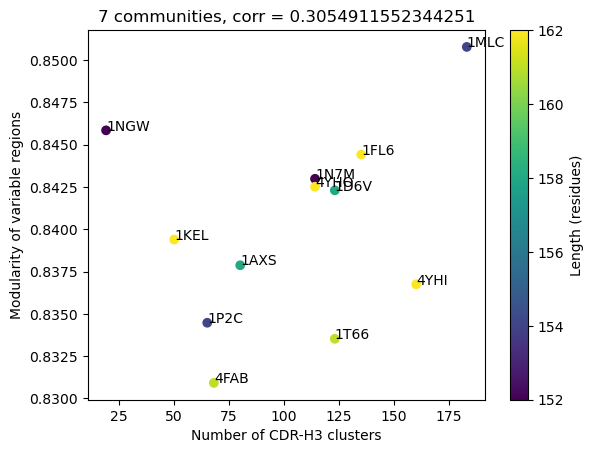

In [30]:
clusters = np.array([135, 50, 183, 65, 123, 80, 114, 19, 160, 114, 123, 68])
modularity_7 = np.array([0.844416158428615, 0.8393944907921915, 0.8507790134744528, 0.8344753790972598, 0.8423035834719939, 0.8378737918022459, 0.8429840079994817, 0.8458479482403684, 0.8367455373729055, 0.8425139263324823, 0.8335267192981255, 0.8309189716265274])
length = np.array([162, 162, 154, 154, 158, 158, 152, 152, 162, 162, 161, 161])
pdb = np.array(['1FL6', '1KEL', '1MLC', '1P2C', '1D6V', '1AXS', '1N7M', '1NGW', '4YHI', '4YHO', '1T66', '4FAB'])
corr_7_comm = np.corrcoef(clusters, modularity_7)[0, 1]
fig, ax = plt.subplots()

im = ax.scatter(clusters, modularity_7, c=length)

for i, txt in enumerate(pdb):
    ax.annotate(txt, (clusters[i], modularity_7[i]))
fig.colorbar(im, orientation='vertical', label='Length (residues)')
ax.set_xlabel('Number of CDR-H3 clusters')
ax.set_ylabel('Modularity of variable regions')
ax.set_title('7 communities, corr = ' + str(corr_7_comm))

plt.show()

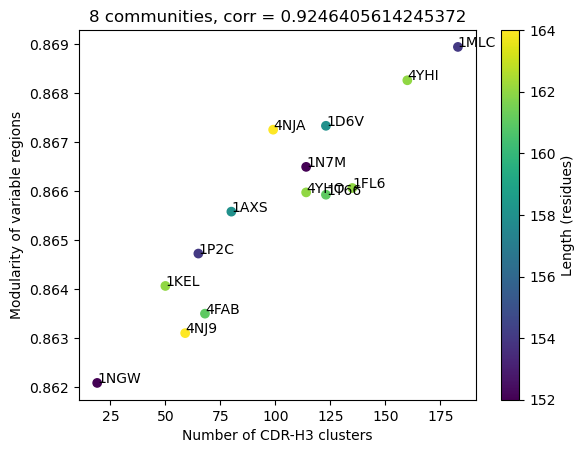

In [31]:
clusters = np.array([135, 50, 183, 65, 123, 80, 114, 19, 160, 114, 123, 68, 99, 59])
modularity_8 = np.array([0.8660696015240872, 0.8640714413063314, 0.8689485740461947, 0.8647322045191498, 0.8673392438501467, 0.8655875778046522, 0.8665010192090012, 0.8620924475466375, 0.8682682733796556, 0.865980418189893, 0.8659325881992936, 0.8635057508209337, 0.8672597739587734, 0.8631084331009338])
length = np.array([162, 162, 154, 154, 158, 158, 152, 152, 162, 162, 161, 161, 164, 164])
pdb = np.array(['1FL6', '1KEL', '1MLC', '1P2C', '1D6V', '1AXS', '1N7M', '1NGW', '4YHI', '4YHO', '1T66', '4FAB', '4NJA', '4NJ9'])
corr_8_comm = np.corrcoef(clusters, modularity_8)[0, 1]
fig, ax = plt.subplots()

im = ax.scatter(clusters, modularity_8, c=length)

for i, txt in enumerate(pdb):
    ax.annotate(txt, (clusters[i], modularity_8[i]))
fig.colorbar(im, orientation='vertical', label='Length (residues)')
ax.set_xlabel('Number of CDR-H3 clusters')
ax.set_ylabel('Modularity of variable regions')
ax.set_title('8 communities, corr = ' + str(corr_8_comm))

plt.show()

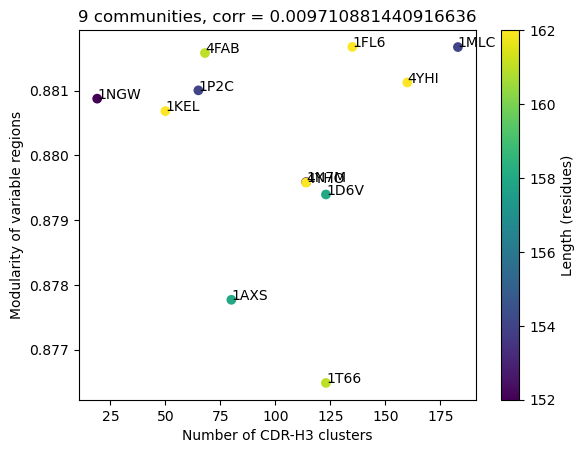

In [32]:
clusters = np.array([135, 50, 183, 65, 123, 80, 114, 19, 160, 114, 123, 68])
modularity_9 = np.array([0.8816740462501381, 0.8806828250587558, 0.8816718658990056, 0.8810032931284826, 0.8793949161126646, 0.8777682785785985, 0.8795863137432779, 0.8808751929205049, 0.8811250122984673, 0.8795789461040492, 0.876484363659328, 0.8815795419619711])
length = np.array([162, 162, 154, 154, 158, 158, 152, 152, 162, 162, 161, 161])
pdb = np.array(['1FL6', '1KEL', '1MLC', '1P2C', '1D6V', '1AXS', '1N7M', '1NGW', '4YHI', '4YHO', '1T66', '4FAB'])
corr_9_comm = np.corrcoef(clusters, modularity_9)[0, 1]
fig, ax = plt.subplots()

im = ax.scatter(clusters, modularity_9, c=length)

for i, txt in enumerate(pdb):
    ax.annotate(txt, (clusters[i], modularity_9[i]))
fig.colorbar(im, orientation='vertical', label='Length (residues)')
ax.set_xlabel('Number of CDR-H3 clusters')
ax.set_ylabel('Modularity of variable regions')
ax.set_title('9 communities, corr = ' + str(corr_9_comm))

plt.show()

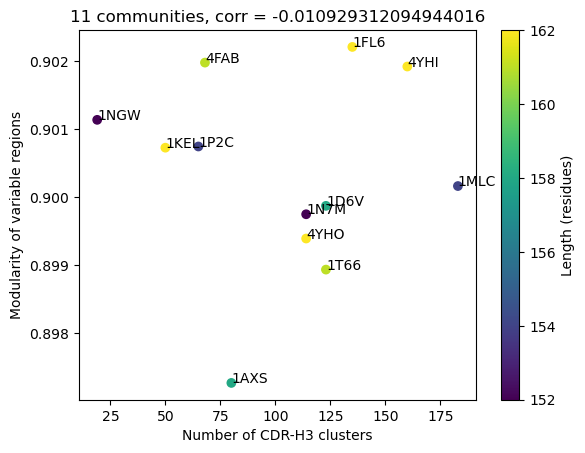

In [33]:
clusters = np.array([135, 50, 183, 65, 123, 80, 114, 19, 160, 114, 123, 68])
modularity_11 = np.array([0.9022067112956202, 0.9007272674707987, 0.9001639725299443, 0.900744753241983, 0.8998732489576601, 0.8972730737618435, 0.8997496948462294, 0.9011360022245972, 0.9019189566552047, 0.8993933243385059, 0.8989370095910175, 0.9019765564141535])
length = np.array([162, 162, 154, 154, 158, 158, 152, 152, 162, 162, 161, 161])
pdb = np.array(['1FL6', '1KEL', '1MLC', '1P2C', '1D6V', '1AXS', '1N7M', '1NGW', '4YHI', '4YHO', '1T66', '4FAB'])
corr_11_comm = np.corrcoef(clusters, modularity_11)[0, 1]
fig, ax = plt.subplots()

im = ax.scatter(clusters, modularity_11, c=length)

for i, txt in enumerate(pdb):
    ax.annotate(txt, (clusters[i], modularity_11[i]))
fig.colorbar(im, orientation='vertical', label='Length (residues)')
ax.set_xlabel('Number of CDR-H3 clusters')
ax.set_ylabel('Modularity of variable regions')
ax.set_title('11 communities, corr = ' + str(corr_11_comm))

plt.show()

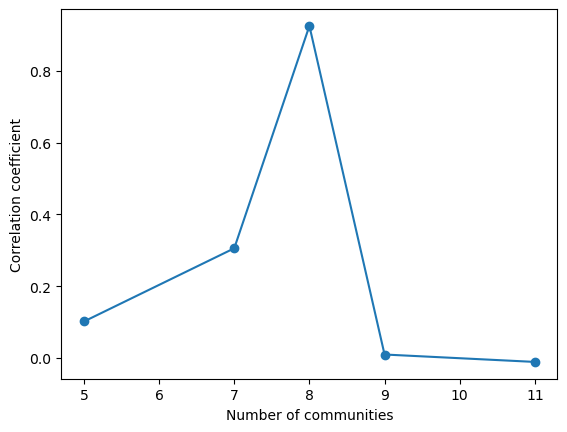

In [34]:
corr = np.array([corr_5_comm, corr_7_comm, corr_8_comm, corr_9_comm, corr_11_comm])
communities = np.array([5, 7, 8, 9, 11])
plt.plot(communities, corr, marker='o', markersize=6)
plt.ylabel('Correlation coefficient')
plt.xlabel('Number of communities')
plt.show()

# 4. Affinity and deltaG

### 4.1. Modularity vs affinity data

In [35]:
import matplotlib.cm as cm

affinity = np.array([2.50e-05, 3.70e-08, 9.10e-08, 9.80e-11, 6.7e-07, 1.7e-08, 1.96e-06, 2.07e-08, 1.35e-04, 1e-08, 6e-07, 1.08e-07, 1.8e-11, 8.33e-09, 1.10e-10, 6e-07, 1.2e-08, 3.8e-07, 7.1e-07])
deltaG = np.array([-9.83, -9.60, -13.65, -8.42, -10.60, -7.78, -10.48, -5.31, -10.91, -8.49, -9.50, -14.66, -11.02, -14.12, -8.49, -10.81, -8.76, -8.39])
pdb_aff = np.array(['1FL6', '1KEL', '1MLC', '1P2C', '1D6V', '1AXS', '1N7M', '1NGW', '1AJ7', '1GAF', '4NJA', '4NJ9', '4YHO', '4FAB', '1CZ8', '2Y07', '4HS8', '2Y36', '5IGX'])
label = ['Naïve', 'Matured', 'Naïve', 'Matured', 'Naïve', 'Matured', 'Naïve', 'Matured', 'Naïve', 'Matured', 'Naïve', 'Matured', 'Matured', 'Matured', 'Matured', 'Naïve', 'Matured', 'Naïve', 'Naïve'] 
modularity_8_aff = np.array([0.8660696015240872, 0.8640714413063314, 0.8689485740461947, 0.8647322045191498, 0.8673392438501467, 0.8655875778046522, 0.8665010192090012, 0.8620924475466375, 0.8646864782491781, 0.8620350656242408, 0.8672597739587734, 0.8631084331009338, 0.865980418189893, 0.8635057508209337, 0.8656069496361544, 0.8659532377012988, 0.8637621519672141, 0.8665215741341868, 0.8656743299894508])
modularity_5_aff = np.array([0.7809155404343685, 0.7776635338586213, 0.7869587737479866, 0.7833383441000149, 0.790996326748399, 0.7890462237174074, 0.7870271497817197, 0.7820544954501715, 0.7821071389945145, 0.7784426895687988])
modularity_11_aff = np.array([0.9022067112956202, 0.9007272674707987, 0.9001639725299443, 0.900744753241983, 0.8998732489576601, 0.8972730737618435, 0.8997496948462294, 0.9011360022245972, 0.8993933243385059, 0.9019765564141535])

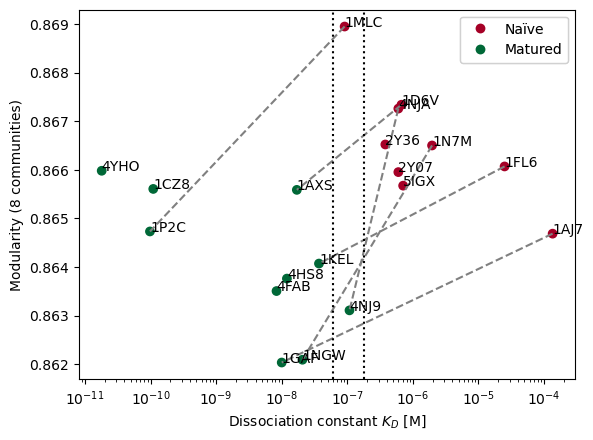

In [36]:
fig, ax = plt.subplots()

color = np.array([0 if label[i]=='Naïve' else 1 for i in range(len(label))])
im = ax.scatter(affinity, modularity_8_aff, c=color, cmap='RdYlGn')
handles, _ = im.legend_elements(prop="colors") # use my own labels
legend1 = ax.legend(handles, label, loc="upper right")
ax.add_artist(legend1)

for i in range((len(pdb_aff)-6)//2):     
    plt.plot([affinity[2*i], affinity[2*i+1]], [modularity_8_aff[2*i],  modularity_8_aff[2*i+1]], c='grey', linestyle='--')
for i, txt in enumerate(pdb_aff):
    ax.annotate(txt, (affinity[i], modularity_8_aff[i]))

ax.set_xlabel('Dissociation constant $K_D$ [M]')
ax.set_ylabel('Modularity (8 communities)')
ax.set_xscale('log')
plt.axvline(6e-8, c='k', linestyle='dotted')
plt.axvline(1.8e-7, c='k', linestyle='dotted')
plt.show()

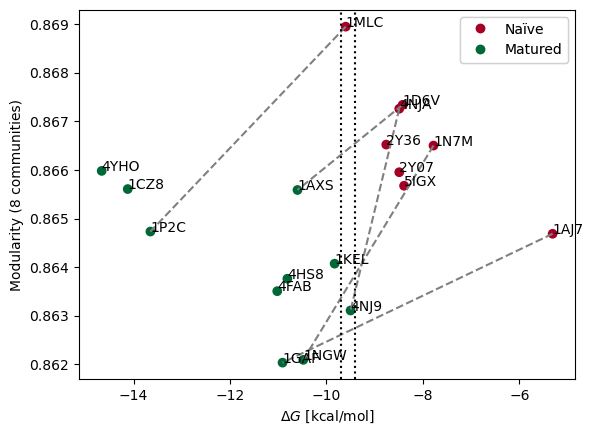

In [37]:
fig, ax = plt.subplots()

color = np.array([0 if label[i]=='Naïve' else 1 for i in range(len(label))])
im = ax.scatter(deltaG, modularity_8_aff[1:], c=color[1:], cmap='RdYlGn')
handles, _ = im.legend_elements(prop="colors") # use my own labels
legend1 = ax.legend(handles, label, loc="upper right")
ax.add_artist(legend1)

for i in range((len(pdb_aff[2:])-6)//2):     
    plt.plot([deltaG[1:][2*i], deltaG[1:][2*i+1]], [modularity_8_aff[2:][2*i],  modularity_8_aff[2:][2*i+1]], c='grey', linestyle='--')
for i, txt in enumerate(pdb_aff[1:]):
    ax.annotate(txt, (deltaG[i], modularity_8_aff[1:][i]))

ax.set_xlabel('$\Delta G$ [kcal/mol]')
ax.set_ylabel('Modularity (8 communities)')
plt.axvline(-9.7, c='k', linestyle='dotted')
plt.axvline(-9.4, c='k', linestyle='dotted')
plt.show()

### 4.2.  Kd and deltaG distributions

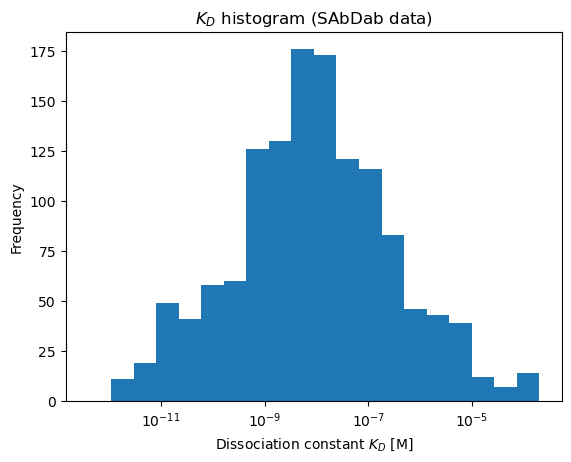

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loghist(x, bins):
  _, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')
    
def precision_round(number, digits=3):
    power = "{:e}".format(number).split('e')[1]
    return round(number, -(int(power) - digits))

df = pd.read_csv('sabdab_summary_all.tsv', sep='\t', header=0)[['affinity']].replace(to_replace='None', value=np.nan).dropna().astype(float)
x = df['affinity'].values.tolist()
plot_loghist(x, 20)
plt.xlabel('Dissociation constant $K_D$ [M]')
plt.ylabel('Frequency')
plt.title('$K_D$ histogram (SAbDab data)')
plt.show()

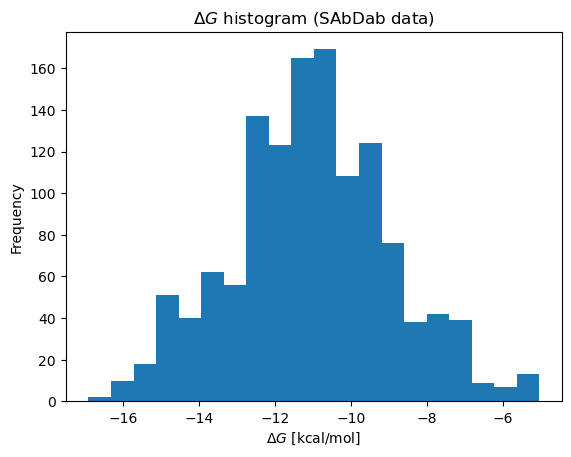

In [39]:
df = pd.read_csv('sabdab_summary_all.tsv', sep='\t', header=0)[['delta_g']].replace(to_replace='None', value=np.nan).dropna().astype(float)
x = df['delta_g'].values.tolist()
plt.hist(x, 20)
plt.xlabel('$\Delta G$ [kcal/mol]')
plt.ylabel('Frequency')
plt.title('$\Delta G$ histogram (SAbDab data)')
plt.show()

In [40]:
df_affinity = pd.read_csv('sabdab_summary_all.tsv', sep='\t', header=0)[['pdb', 'antigen_type', 'antigen_name', 'compound', 'organism', 'affinity', 'delta_g']]
affinity_germline = df_affinity[df_affinity.apply(lambda x: x.astype('string').str.contains('germline|naive| native | precursor |4yhi|1mlc', case=False).any(), axis=1)].sort_values('pdb').drop_duplicates(['pdb'])['affinity'].replace(to_replace='None', value=np.nan).dropna().astype(float)
df_affinity.loc[affinity_germline.index]

,pdb,antigen_type,antigen_name,compound,organism,affinity,delta_g
3371,1aj7,Hapten,5-(PARA-NITROPHENYL PHOSPHONATE)-PENTANOIC ACID,IMMUNOGLOBULIN 48G7 GERMLINE FAB ANTIBODY COMP...,MUS MUSCULUS; HOMO SAPIENS,1.35e-04,-5.31
4490,1fl6,Hapten,?,THE HAPTEN COMPLEXED GERMLINE PRECURSOR TO SUL...,MUS MUSCULUS; HOMO SAPIENS,2.50e-05,NaN
2053,1mlc,protein,hen egg white lysozyme,MONOCLONAL ANTIBODY FAB D44.1 RAISED AGAINST C...,MUS MUSCULUS; GALLUS GALLUS,9.10e-08,-9.6
11133,1n7m,Hapten,N-METHYLMESOPORPHYRIN,Germline 7G12 with N-methylmesoporphyrin,"MUS MUSCULUS, HOMO SAPIENS",1.96e-06,-7.78
10495,2a6d,peptide,"dodecapeptide, rlliadppspre",Crystal structure analysis of the anti-arsonat...,MUS MUSCULUS; SYNTHETIC CONSTRUCT,1.5e-07,-9.309477166508257
11603,2a6i,peptide,dodecapeptide,Crystal structure analysis of the anti-arsonat...,MUS MUSCULUS; SYNTHETIC CONSTRUCT,1.20e-07,-9.44
2952,2a6k,NaN,NaN,Crystal Structure Analysis of the germline ant...,MUS MUSCULUS; SYNTHETIC CONSTRUCT,2.0999999999999997e-07,-9.11012285753709
8729,2p49,protein,ribonuclease pancreatic,Complex of a camelid single-domain vhh antibod...,CAMELUS DROMEDARIUS; BOS TAURUS,2.30e-08,-10.59
5732,2xzq,peptide,phage display derived antigen,CRYSTAL STRUCTURE ANALYSIS OF THE ANTI-(4-HYDR...,MUS MUSCULUS; SYNTHETIC CONSTRUCT,2.6e-07,-8.983583688639808
1278,2y06,peptide,phage display derived antigen,CRYSTAL STRUCTURE ANALYSIS OF THE ANTI-(4-HYDR...,MUS MUSCULUS; SYNTHETIC CONSTRUCT,8e-07,-8.317673448912437


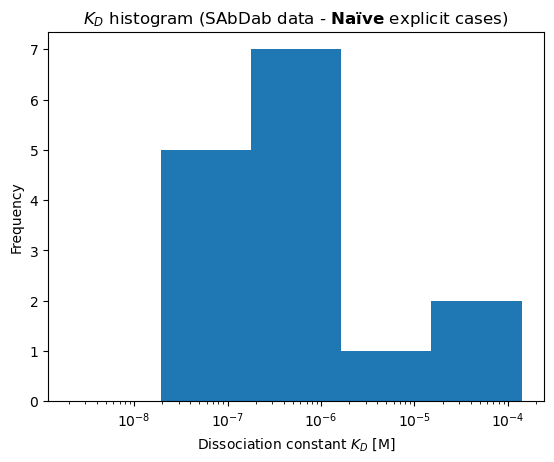

In [41]:
plot_loghist(affinity_germline.apply(lambda x: precision_round(x, 1)).values.tolist(), 5)
plt.xlabel('Dissociation constant $K_D$ [M]')
plt.ylabel('Frequency')
plt.title('$K_D$ histogram (SAbDab data - $\\bf{Naïve}$ explicit cases)')
plt.show()

In [42]:
affinity_matured = df_affinity[df_affinity.apply(lambda x: x.astype('string').str.contains(' matur| high aff|1kel|1p2c|4fab|1gaf|4yho|4nj9', case=False).any(), axis=1) & ~df_affinity.apply(lambda x: x.astype('string').str.contains('1aj7|1d6v|2j6e', case=False).any(), axis=1)].sort_values('pdb').drop_duplicates(['pdb'])['affinity'].replace(to_replace='None', value=np.nan).dropna().astype(float)
df_affinity.loc[affinity_matured.index]

,pdb,antigen_type,antigen_name,compound,organism,affinity,delta_g
12197,1cz8,protein,vascular endothelial growth factor,VASCULAR ENDOTHELIAL GROWTH FACTOR IN COMPLEX ...,HOMO SAPIENS; MUS MUSCULUS,1.10e-10,-14.12
13159,1gaf,Hapten,5-(PARA-NITROPHENYL PHOSPHONATE)-PENTANOIC ACID,48G7 HYBRIDOMA LINE FAB COMPLEXED WITH HAPTEN ...,HOMO SAPIENS,1e-08,-10.913952715282035
8085,1kel,Hapten,?,CATALYTIC ANTIBODY 28B4 FAB FRAGMENT COMPLEXED...,MUS MUSCULUS,3.70e-08,-9.83
574,1ngw,Hapten,N-METHYLMESOPORPHYRIN,Chimeric Affinity Matured Fab 7g12 complexed w...,"MUS MUSCULUS, HOMO SAPIENS",2.07e-08,-10.48
7132,1p2c,protein,lysozyme c,crystal structure analysis of an anti-lysozyme...,MUS MUSCULUS; GALLUS GALLUS,9.80e-11,-13.65
11346,2p4a,protein,ribonuclease pancreatic,X-ray structure of a camelid affinity matured ...,CAMELUS DROMEDARIUS; BOS TAURUS,1.80e-10,-13.51
11598,4fab,Hapten,FLUORESCIN,THREE-DIMENSIONAL STRUCTURE OF A FLUORESCEIN-F...,MUS MUSCULUS,8.33e-09,-11.02
7330,4nj9,Hapten,"8-methoxypyrene-1,3,6-trisulfonic acid",Crystal structure of Fab 8B10 in complex with ...,MUS MUSCULUS,1.08e-07,-9.504110465002816
1509,4yho,Hapten,N-[(2-{[(4-carbamimidoylphenyl)amino]methyl}-1...,Reversal Agent for Dabigatran,HOMO SAPIENS,1.8e-11,-14.658430977236662


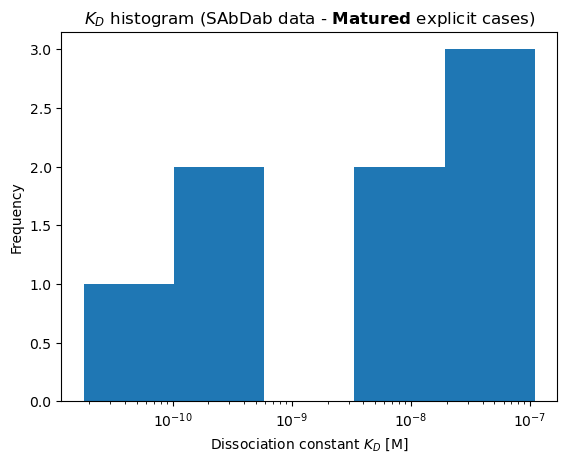

In [43]:
plot_loghist(affinity_matured.apply(lambda x: precision_round(x, 1)).values.tolist(), 5)
plt.xlabel('Dissociation constant $K_D$ [M]')
plt.ylabel('Frequency')
plt.title('$K_D$ histogram (SAbDab data - $\\bf{Matured}$ explicit cases)')
plt.show()

# 5. 2D-RMSD plotting

In [44]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD, CRD, DCD2
from MDAnalysis.analysis import diffusionmap, align, rms
import numpy as np
import matplotlib.pyplot as plt

# Typically RMSD is used as a quantitative measure of similarity between two or more protein structures.

In [46]:
adk_open = mda.Universe(CRD, DCD2)
adk_closed = mda.Universe(PSF, DCD)

/Users/kevinmicha/opt/anaconda3/envs/antiberta/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [47]:
adk_open.atoms

<AtomGroup with 3341 atoms>

In [48]:
adk_open.trajectory

<DCDReader /Users/kevinmicha/opt/anaconda3/envs/antiberta/lib/python3.9/site-packages/MDAnalysisTests/data/adk_dims2.dcd with 102 frames of 3341 atoms>

In [49]:
aligner = align.AlignTraj(adk_open, adk_open, select='name CA', in_memory=True).run()

In [50]:
matrix = diffusionmap.DistanceMatrix(adk_open, select='name CA').run()

In [51]:
matrix.results.dist_matrix.shape

(102, 102)

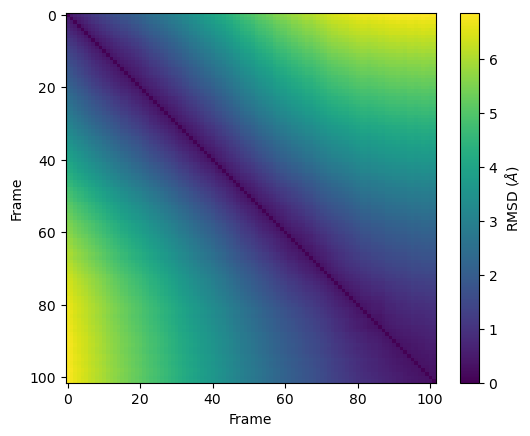

In [52]:
plt.imshow(matrix.results.dist_matrix, cmap='viridis')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)');

In [53]:
prmsd = np.zeros((len(adk_open.trajectory),  # y-axis
                  len(adk_closed.trajectory)))  # x-axis


In [54]:
prmsd

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
for i, frame_open in enumerate(adk_open.trajectory):
    r = rms.RMSD(adk_closed, adk_open, select='name CA', ref_frame=i).run()
    prmsd[i] = r.results.rmsd[:, -1]  # select 3rd column with RMSD values

In [56]:
prmsd

array([[0.47096554, 0.55041594, 0.70037181, ..., 6.8092771 , 6.81932511,
        6.82069062],
       [0.56492031, 0.55869681, 0.64331294, ..., 6.71518282, 6.72548769,
        6.72811576],
       [0.65668361, 0.61298739, 0.64618477, ..., 6.58873757, 6.60008411,
        6.60391327],
       ...,
       [6.81085291, 6.69478787, 6.58607219, ..., 0.51260618, 0.52473819,
        0.52714268],
       [6.79778646, 6.680908  , 6.57141025, ..., 0.49719108, 0.52034109,
        0.52536609],
       [6.81729387, 6.70007503, 6.59104166, ..., 0.48695905, 0.50107629,
        0.50267394]])

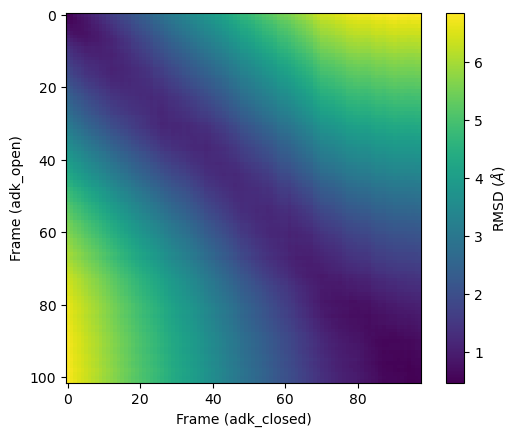

In [57]:
plt.imshow(prmsd, cmap='viridis')
plt.xlabel('Frame (adk_closed)')
plt.ylabel('Frame (adk_open)')
plt.colorbar(label=r'RMSD ($\AA$)');

In [58]:
u = mda.Universe('pdbs/1p2c_chothia.pdb')  
ref = mda.Universe('pdbs/2q76_chothia.pdb')  

rms.rmsd(u.select_atoms('backbone').positions,  # coordinates to align
         ref.select_atoms('backbone').positions,  # reference coordinates
         center=True,  # subtract the center of geometry
         superposition=True)  # superimpose coordinates

0.8678583228453427

In [59]:
# RMSD-1D for antibody pairs

#1fl6-1fl5: 0.8903588682378186 (N)
#1kel-1kem: 0.44457722590806564 (M)

#1mlc-1mlb: 0.6410629116863884 (N)
#1p2c-2q76: 0.8678583228453427 (M)

# 6. Mutations

### 6.1. Modularity vs mutations

In [60]:
modularity_11

array([0.90220671, 0.90072727, 0.90016397, 0.90074475, 0.89987325,
       0.89727307, 0.89974969, 0.901136  , 0.90191896, 0.89939332,
       0.89893701, 0.90197656])

In [61]:
n_mutations = np.transpose(np.repeat(np.array([8, 12, 6, 4, 1, 10]).reshape(1, 6), repeats=5, axis=0)).flatten()
labels = np.repeat(np.array(['28B4', 'D44.1-F10.6.6', 'AZ28', '7G12', 'aDabiFab', '4-4-20']), 5)
communities = np.tile(np.array([5, 7, 8, 9, 11]), 6)
modularity = np.array([modularity_5, modularity_7, modularity_8, modularity_9, modularity_11], dtype=object)
delta_mod = np.array([modularity[j][2*i+1]-modularity[2][2*i] for i in range(6) for j in range(modularity.shape[0])]).flatten()

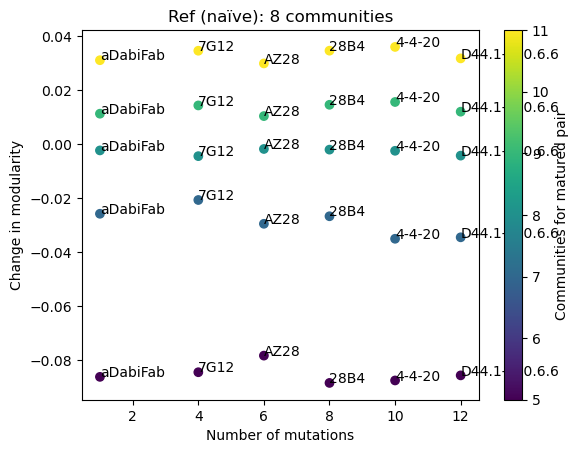

In [62]:
fig, ax = plt.subplots()
im = ax.scatter(n_mutations, delta_mod, c=communities)

for i, txt in enumerate(labels):
    ax.annotate(txt, (n_mutations[i], delta_mod[i]))
ax.set_xlabel('Number of mutations')
ax.set_ylabel('Change in modularity')
fig.colorbar(im, orientation='vertical', label='Communities for matured pair')
ax.set_title('Ref (naïve): 8 communities')

plt.show()

In [63]:
delta_mod

array([-0.08840607, -0.02667511, -0.00199816,  0.01461322,  0.03465767,
       -0.08561023, -0.03447319, -0.00421637,  0.01205472,  0.03179618,
       -0.07829302, -0.02946545, -0.00175167,  0.01042903,  0.02993383,
       -0.08444652, -0.02065307, -0.00440857,  0.01437417,  0.03463498,
       -0.08616113, -0.02575435, -0.00228786,  0.01131067,  0.03112505,
       -0.0874899 , -0.03501362, -0.00242684,  0.01564695,  0.03604397])

In [64]:
modularity_5[1]-modularity_8[0]

-0.08840606766546588

### 6.2. Affinity ($\Delta K_D$) vs mutations

In [65]:
n_mutations_variable = np.array([9, 18, 9, 5, 9, 5])
n_mutations_cdrs = np.array([8, 12, 6, 4, 9, 4])
n_mutations_cdrh3 = np.array([0, 2, 0, 1, 0, 1])
labels = np.array(['28B4', 'D44.1-F10.6.6', 'AZ28', '7G12', '48G7', 'Anti-MPTS'])
affinity = np.array([2.50e-05, 3.70e-08, 9.10e-08, 9.80e-11, 6.7e-07, 1.7e-08, 1.96e-06, 2.07e-08, 1.35e-04, 1e-08, 6e-07, 1.08e-07])
pdb_aff = np.array(['1FL6', '1KEL', '1MLC', '1P2C', '1D6V', '1AXS', '1N7M', '1NGW', '1AJ7', '1GAF', '4NJA', '4NJ9'])
delta_affinity = np.array([np.log10(affinity[2*i]/affinity[2*i+1]) for i in range(len(labels))])

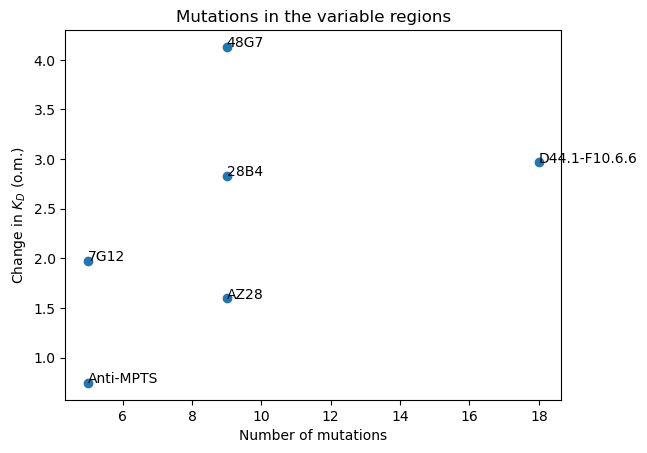

In [66]:
fig, ax = plt.subplots()
im = ax.scatter(n_mutations_variable, delta_affinity)

for i, txt in enumerate(labels):
    ax.annotate(txt, (n_mutations_variable[i], delta_affinity[i]))
ax.set_xlabel('Number of mutations')
ax.set_ylabel('Change in $K_D$ (o.m.)')
ax.set_title('Mutations in the variable regions')

plt.show()

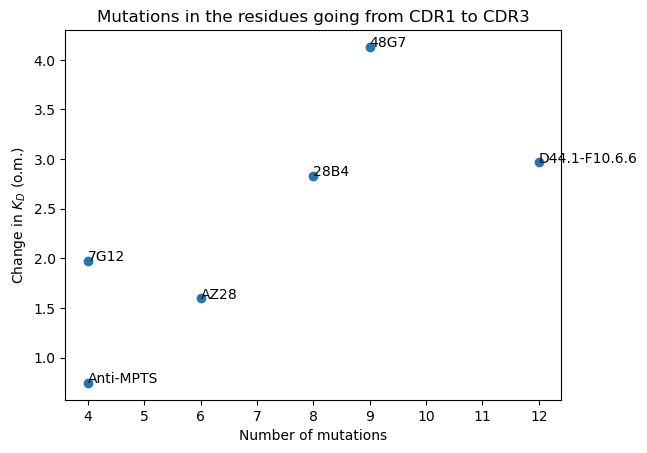

In [67]:
fig, ax = plt.subplots()
im = ax.scatter(n_mutations_cdrs, delta_affinity)

for i, txt in enumerate(labels):
    ax.annotate(txt, (n_mutations_cdrs[i], delta_affinity[i]))
ax.set_xlabel('Number of mutations')
ax.set_ylabel('Change in $K_D$ (o.m.)')
ax.set_title('Mutations in the residues going from CDR1 to CDR3')

plt.show()

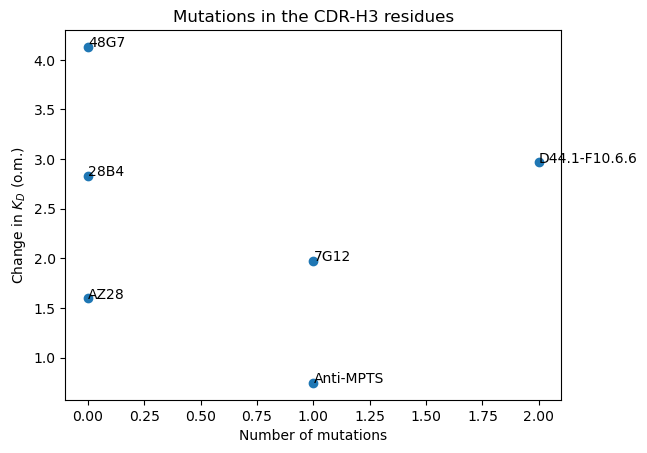

In [68]:
fig, ax = plt.subplots()
im = ax.scatter(n_mutations_cdrh3, delta_affinity)

for i, txt in enumerate(labels):
    ax.annotate(txt, (n_mutations_cdrh3[i], delta_affinity[i]))
ax.set_xlabel('Number of mutations')
ax.set_ylabel('Change in $K_D$ (o.m.)')
ax.set_title('Mutations in the CDR-H3 residues')

plt.show()

# 7. B-factors (displacement of atoms from mean positions)

In [116]:
import matplotlib.pyplot as plt
import os
import pymol
import pandas as pd
from pymol import cmd, stored
from pathlib import Path
import time

downloads_path = str(Path.home() / 'Downloads') + '/all_structures/chothia/'

In [255]:
generate_cdr1_to_cdr3_pdb(str(Path.home() / 'Downloads/2bjm_chothia.pdb'))

In [117]:
def generate_cdrh3_pdb(path):
    with open(path, 'r') as f: # needs to be Chothia-numbered
        content = f.readlines()
        header_lines_important = range(4)
        header_lines = [content[i][0]=='R' for i in range(len(content))].count(True)
        cdr_h3_range = range(95, 103)
        chain_range = slice(21, 22)
        res_range = slice(23, 26)
        h_chain_key = 'HCHAIN'
        l_chain_key = 'LCHAIN'
        idx_list = list(header_lines_important)
        new_path = path[:-4] + '_CDR-H3' + path[-4:]
        
        # Getting the names of the heavy and light chains
        line = content[header_lines_important[-1]]
        if line.find(h_chain_key) != -1:
            h_pos = line.find(h_chain_key) + len(h_chain_key) + 1
            l_pos = line.find(l_chain_key) + len(l_chain_key) + 1
            h_chain = line[h_pos:h_pos+1]
            l_chain = line[l_pos:l_pos+1]
            
            # Obtaining the CDR-H3 lines
            for i, line in enumerate(content[header_lines:]):
                if line[chain_range].find(h_chain) != -1 and int(line[res_range]) in cdr_h3_range:
                    idx_list.append(i+header_lines)
                    
    # Creating new file
    with open(new_path, 'w') as f_new:
        f_new.writelines([content[l] for l in idx_list])
        
def generate_cdr1_to_cdr3_pdb(path):
    with open(path, 'r') as f: # needs to be Chothia-numbered
        content = f.readlines()
        header_lines_important = range(4)
        header_lines = [content[i][0]=='R' for i in range(len(content))].count(True)
        h_range = range(26, 103)
        l_range = range(24, 98)
        chain_range = slice(21, 22)
        res_range = slice(23, 26)
        h_chain_key = 'HCHAIN'
        l_chain_key = 'LCHAIN'
        idx_list = list(header_lines_important)
        new_path = path[:-4] + '_CDR1_to_CDR3' + path[-4:]
        
        # Getting the names of the heavy and light chains
        line = content[header_lines_important[-1]]
        if line.find(h_chain_key) != -1:
            h_pos = line.find(h_chain_key) + len(h_chain_key) + 1
            l_pos = line.find(l_chain_key) + len(l_chain_key) + 1
            h_chain = line[h_pos:h_pos+1]
            l_chain = line[l_pos:l_pos+1]
            
            # Obtaining the CDR1 to CDR3 lines for both chains
            for i, line in enumerate(content[header_lines:]):
                if (line[chain_range].find(h_chain) != -1 and int(line[res_range]) in h_range) or (line[chain_range].find(l_chain) != -1 and int(line[res_range]) in l_range):
                    idx_list.append(i+header_lines)
            
                    
    # Creating new file
    with open(new_path, 'w') as f_new:
        f_new.writelines([content[l] for l in idx_list])
        
def average_b(selection):
    stored.tempfactor = 0
    stored.atomnumber = 0
    cmd.iterate(selection, "stored.tempfactor = stored.tempfactor + b")
    cmd.iterate(selection, "stored.atomnumber = stored.atomnumber + 1")
    print("Your selection: %s" % selection)
    print("sum of B factors: %s" % stored.tempfactor)
    print("number of atoms: %s" % stored.atomnumber)
    try:
        averagetempfactor = stored.tempfactor / stored.atomnumber
    except ZeroDivisionError:
        return 0
    print("average B of '%s': %s\n" % (selection, averagetempfactor))
    
    return averagetempfactor

In [118]:
def b_factor_calculator(list_entries, selection='_CDR-H3'):
    folder = downloads_path
    entries = map(str.lower, list_entries)
    numbering = '' #'_chothia'
    selection = selection # Choose between '_CDR1_to_CDR3', '_CDR-H3' and ''
    file_type = '.pdb'
    values = []

    for entry in entries:
        file_name = entry + numbering + selection
        path = folder + file_name + file_type

        generate_cdrh3_pdb(folder+entry+numbering+file_type)
        #generate_cdr1_to_cdr3_pdb(folder+entry+numbering+file_type)

        cmd.load(path)
        values.append(average_b(file_name))

        if os.path.exists(path):
            os.remove(path)
    return values

In [233]:
df = pd.read_csv('sabdab_summary_all.tsv', sep='\t', header=0)[['pdb', 'antigen_type', 'antigen_name', 'compound', 'organism', 'resolution']]
df.drop_duplicates(keep='first', inplace=True)
df = df[(df.antigen_type.notna()) & (df.antigen_type != 'NA')]
df = df[(df.resolution != 'NOT') & (df.resolution != '8.9, 8.9') & (df.resolution != '3.9, 3.9')] 
df = df[np.float64(df.resolution) <= 2.5]

entries = list(df['pdb']) # ['1FL6', '1KEL', '1MLC', '1P2C', '1D6V', '1AXS', '1N7M', '1NGW', '4YHI', '4YHO', '1T66', '4FAB', '1AJ7', '1GAF', '1MCF']

In [236]:
start_time = time.time()
b_factors = b_factor_calculator(entries) #, '_CDR1_to_CDR3')
print("--- Execution time: %s seconds ---" % (time.time() - start_time))

Your selection: 7t17_CDR-H3
sum of B factors: 28915.56005859375
number of atoms: 52
average B of '7t17_CDR-H3': 556.0684626652644

Your selection: 7jmo_CDR-H3
sum of B factors: 3219.1799907684326
number of atoms: 72
average B of '7jmo_CDR-H3': 44.71083320511712

Your selection: 4o51_CDR-H3
sum of B factors: 2321.369997024536
number of atoms: 66
average B of '4o51_CDR-H3': 35.17227268218994

Your selection: 7orb_CDR-H3
sum of B factors: 6379.449981689453
number of atoms: 108
average B of '7orb_CDR-H3': 59.06898131193938

Your selection: 5l21_CDR-H3
sum of B factors: 800.100004196167
number of atoms: 24
average B of '5l21_CDR-H3': 33.337500174840294

Your selection: 5mi0_CDR-H3
sum of B factors: 4921.2700271606445
number of atoms: 117
average B of '5mi0_CDR-H3': 42.062136984279014

Your selection: 2ny3_CDR-H3
sum of B factors: 3237.559994697571
number of atoms: 154
average B of '2ny3_CDR-H3': 21.023116848685525

Your selection: 4yo0_CDR-H3
sum of B factors: 2296.999990463257
number of at

Your selection: 7ubx_CDR-H3
sum of B factors: 2830.4000034332275
number of atoms: 87
average B of '7ubx_CDR-H3': 32.53333337279572

Your selection: 6zwk_CDR-H3
sum of B factors: 9023.049991607666
number of atoms: 272
average B of '6zwk_CDR-H3': 33.1729779103223

Your selection: 5ifj_CDR-H3
sum of B factors: 6874.34001159668
number of atoms: 104
average B of '5ifj_CDR-H3': 66.09942318842961

Your selection: 7tp3_CDR-H3
sum of B factors: 8459.63998413086
number of atoms: 144
average B of '7tp3_CDR-H3': 58.74749988979764

Your selection: 1q72_CDR-H3
sum of B factors: 2807.359992980957
number of atoms: 78
average B of '1q72_CDR-H3': 35.991794781807144

Your selection: 7r1z_CDR-H3
sum of B factors: 11921.440000534058
number of atoms: 294
average B of '7r1z_CDR-H3': 40.54911564807502

Your selection: 6xp6_CDR-H3
sum of B factors: 2612.379997253418
number of atoms: 70
average B of '6xp6_CDR-H3': 37.319714246477396

Your selection: 5m2m_CDR-H3
sum of B factors: 3406.519992828369
number of atom

Your selection: 5npi_CDR-H3
sum of B factors: 1928.3399906158447
number of atoms: 89
average B of '5npi_CDR-H3': 21.66674146759376

Your selection: 5vjq_CDR-H3
sum of B factors: 910.7700023651123
number of atoms: 46
average B of '5vjq_CDR-H3': 19.79934787750244

Your selection: 3oay_CDR-H3
sum of B factors: 4804.659992218018
number of atoms: 107
average B of '3oay_CDR-H3': 44.903364413252504

Your selection: 4m5z_CDR-H3
sum of B factors: 8054.039981842041
number of atoms: 129
average B of '4m5z_CDR-H3': 62.43441846389179

Your selection: 2fr4_CDR-H3
sum of B factors: 3887.590015411377
number of atoms: 95
average B of '2fr4_CDR-H3': 40.92200016222502

Your selection: 1jps_CDR-H3
sum of B factors: 1155.939998626709
number of atoms: 68
average B of '1jps_CDR-H3': 16.999117626863367

Your selection: 3eba_CDR-H3
sum of B factors: 2705.349995613098
number of atoms: 121
average B of '3eba_CDR-H3': 22.35826442655453

Your selection: 7wo4_CDR-H3
sum of B factors: 9373.939933776855
number of ato

Your selection: 6svl_CDR-H3
sum of B factors: 2569.049991607666
number of atoms: 97
average B of '6svl_CDR-H3': 26.485051459872846

Your selection: 6wzk_CDR-H3
sum of B factors: 3431.9500036239624
number of atoms: 145
average B of '6wzk_CDR-H3': 23.668620714648018

Your selection: 6a77_CDR-H3
sum of B factors: 4829.819984436035
number of atoms: 112
average B of '6a77_CDR-H3': 43.123392718178884

Your selection: 7wob_CDR-H3
sum of B factors: 4781.269943237305
number of atoms: 100
average B of '7wob_CDR-H3': 47.812699432373044

Your selection: 5bjz_CDR-H3
sum of B factors: 4933.079996109009
number of atoms: 172
average B of '5bjz_CDR-H3': 28.680697651796564

Your selection: 5ggv_CDR-H3
sum of B factors: 3239.0299940109253
number of atoms: 137
average B of '5ggv_CDR-H3': 23.642554700809672

Your selection: 7ams_CDR-H3
sum of B factors: 4832.069995880127
number of atoms: 128
average B of '7ams_CDR-H3': 37.75054684281349

Your selection: 6qtl_CDR-H3
sum of B factors: 2461.6000061035156
numb

Your selection: 5hi3_CDR-H3
sum of B factors: 2610.2399978637695
number of atoms: 71
average B of '5hi3_CDR-H3': 36.763943631884075

Your selection: 6jep_CDR-H3
sum of B factors: 5090.279985427856
number of atoms: 164
average B of '6jep_CDR-H3': 31.038292594072296

Your selection: 2hkf_CDR-H3
sum of B factors: 392.3599998950958
number of atoms: 69
average B of '2hkf_CDR-H3': 5.6863768100738525

Your selection: 5n88_CDR-H3
sum of B factors: 2552.3600025177
number of atoms: 142
average B of '5n88_CDR-H3': 17.97436621491338

Your selection: 5hi4_CDR-H3
sum of B factors: 2226.7500038146973
number of atoms: 71
average B of '5hi4_CDR-H3': 31.362676110066158

Your selection: 3dus_CDR-H3
sum of B factors: 3408.7500038146973
number of atoms: 84
average B of '3dus_CDR-H3': 40.580357188270206

Your selection: 4qy8_CDR-H3
sum of B factors: 949.5800013542175
number of atoms: 75
average B of '4qy8_CDR-H3': 12.6610666847229

Your selection: 4i1n_CDR-H3
sum of B factors: 4069.6000051498413
number of a

Your selection: 5epm_CDR-H3
sum of B factors: 1294.9099988937378
number of atoms: 94
average B of '5epm_CDR-H3': 13.775638286103593

Your selection: 6obo_CDR-H3
sum of B factors: 2551.4199924468994
number of atoms: 106
average B of '6obo_CDR-H3': 24.069999928744334

Your selection: 6p8d_CDR-H3
sum of B factors: 3379.280002593994
number of atoms: 61
average B of '6p8d_CDR-H3': 55.39803282940974

Your selection: 7yzi_CDR-H3
sum of B factors: 5160.770069122314
number of atoms: 99
average B of '7yzi_CDR-H3': 52.1289905971951

Your selection: 5bv7_CDR-H3
sum of B factors: 4193.159990310669
number of atoms: 120
average B of '5bv7_CDR-H3': 34.94299991925558

Your selection: 3uo1_CDR-H3
sum of B factors: 1487.290002822876
number of atoms: 62
average B of '3uo1_CDR-H3': 23.98854843262703

Your selection: 3hzm_CDR-H3
sum of B factors: 3455.4200105667114
number of atoms: 118
average B of '3hzm_CDR-H3': 29.283220428531454

Your selection: 3g5y_CDR-H3
sum of B factors: 1061.7299995422363
number of 

Your selection: 1tji_CDR-H3
sum of B factors: 4840.789984703064
number of atoms: 162
average B of '1tji_CDR-H3': 29.88141965866089

Your selection: 7wrv_CDR-H3
sum of B factors: 8130.859996795654
number of atoms: 208
average B of '7wrv_CDR-H3': 39.09067306151757

Your selection: 4etq_CDR-H3
sum of B factors: 3851.5599994659424
number of atoms: 95
average B of '4etq_CDR-H3': 40.542736836483606

Your selection: 7neg_CDR-H3
sum of B factors: 4230.360012054443
number of atoms: 77
average B of '7neg_CDR-H3': 54.93974041629147

Your selection: 6hjx_CDR-H3
sum of B factors: 6764.299991607666
number of atoms: 117
average B of '6hjx_CDR-H3': 57.81452984280057

Your selection: 4wy7_CDR-H3
sum of B factors: 6280.100004196167
number of atoms: 134
average B of '4wy7_CDR-H3': 46.86641794176244

Your selection: 7z1c_CDR-H3
sum of B factors: 5972.6900062561035
number of atoms: 147
average B of '7z1c_CDR-H3': 40.6305442602456

Your selection: 8dim_CDR-H3
sum of B factors: 1720.89000082016
number of ato

Your selection: 6sc6_CDR-H3
sum of B factors: 3283.840000152588
number of atoms: 88
average B of '6sc6_CDR-H3': 37.31636363809759

Your selection: 6wo3_CDR-H3
sum of B factors: 6888.970001220703
number of atoms: 141
average B of '6wo3_CDR-H3': 48.85794327106882

Your selection: 1yef_CDR-H3
sum of B factors: 3016.2600078582764
number of atoms: 126
average B of '1yef_CDR-H3': 23.938571490938703

Your selection: 2p44_CDR-H3
sum of B factors: 2095.71000289917
number of atoms: 99
average B of '2p44_CDR-H3': 21.168787908072424

Your selection: 7mmo_CDR-H3
sum of B factors: 3339.3999938964844
number of atoms: 74
average B of '7mmo_CDR-H3': 45.12702694454708

Your selection: 5ig7_CDR-H3
sum of B factors: 5842.2500076293945
number of atoms: 104
average B of '5ig7_CDR-H3': 56.17548084259033

Your selection: 6cdp_CDR-H3
sum of B factors: 4272.9700050354
number of atoms: 75
average B of '6cdp_CDR-H3': 56.97293340047201

Your selection: 6wfy_CDR-H3
sum of B factors: 1553.7899980545044
number of ato

Your selection: 7e7y_CDR-H3
sum of B factors: 4433.960008621216
number of atoms: 130
average B of '7e7y_CDR-H3': 34.10738468170166

Your selection: 1pz5_CDR-H3
sum of B factors: 927.0699987411499
number of atoms: 57
average B of '1pz5_CDR-H3': 16.26438594282719

Your selection: 3p0y_CDR-H3
sum of B factors: 1639.5399990081787
number of atoms: 97
average B of '3p0y_CDR-H3': 16.90247421657916

Your selection: 8dtx_CDR-H3
sum of B factors: 1205.9000024795532
number of atoms: 63
average B of '8dtx_CDR-H3': 19.141269880627828

Your selection: 5my6_CDR-H3
sum of B factors: 2023.2300071716309
number of atoms: 62
average B of '5my6_CDR-H3': 32.63274205115534

Your selection: 7wry_CDR-H3
sum of B factors: 3636.349937438965
number of atoms: 97
average B of '7wry_CDR-H3': 37.48814368493778

Your selection: 1bgx_CDR-H3
sum of B factors: 4928.270004272461
number of atoms: 104
average B of '1bgx_CDR-H3': 47.38721157954289

Your selection: 4glr_CDR-H3
sum of B factors: 5173.959995269775
number of ato

Your selection: 1f58_CDR-H3
sum of B factors: 3227.870002746582
number of atoms: 139
average B of '1f58_CDR-H3': 23.222086350694834

Your selection: 5i8o_CDR-H3
sum of B factors: 1358.9199953079224
number of atoms: 75
average B of '5i8o_CDR-H3': 18.1189332707723

Your selection: 2aep_CDR-H3
sum of B factors: 2484.079996109009
number of atoms: 78
average B of '2aep_CDR-H3': 31.847179437294983

Your selection: 5wnb_CDR-H3
sum of B factors: 4869.590000152588
number of atoms: 124
average B of '5wnb_CDR-H3': 39.27088709800474

Your selection: 6cbv_CDR-H3
sum of B factors: 6135.68998336792
number of atoms: 144
average B of '6cbv_CDR-H3': 42.60895821783278

Your selection: 2i5y_CDR-H3
sum of B factors: 4522.409984588623
number of atoms: 154
average B of '2i5y_CDR-H3': 29.366298601224823

Your selection: 1qd0_CDR-H3
sum of B factors: 2080.410006046295
number of atoms: 127
average B of '1qd0_CDR-H3': 16.38118114997083

Your selection: 5lgh_CDR-H3
sum of B factors: 2840.220012664795
number of at

Your selection: 7lf8_CDR-H3
sum of B factors: 6638.4099979400635
number of atoms: 192
average B of '7lf8_CDR-H3': 34.5750520726045

Your selection: 6b3d_CDR-H3
sum of B factors: 6951.879981994629
number of atoms: 160
average B of '6b3d_CDR-H3': 43.44924988746643

Your selection: 6nv0_CDR-H3
sum of B factors: 2649.510004043579
number of atoms: 72
average B of '6nv0_CDR-H3': 36.79875005616082

Your selection: 4k3h_CDR-H3
sum of B factors: 0
number of atoms: 0
Your selection: 6mtj_CDR-H3
sum of B factors: 4170.019996643066
number of atoms: 111
average B of '6mtj_CDR-H3': 37.5677477175051

Your selection: 7t3m_CDR-H3
sum of B factors: 3087.5000133514404
number of atoms: 97
average B of '7t3m_CDR-H3': 31.82989704486021

Your selection: 7rlv_CDR-H3
sum of B factors: 6555.319995880127
number of atoms: 106
average B of '7rlv_CDR-H3': 61.84264147056724

Your selection: 3zdx_CDR-H3
sum of B factors: 8921.420007705688
number of atoms: 168
average B of '3zdx_CDR-H3': 53.10369052205767

Your select

Your selection: 1ic4_CDR-H3
sum of B factors: 1953.3900108337402
number of atoms: 46
average B of '1ic4_CDR-H3': 42.465000235516094

Your selection: 1aj7_CDR-H3
sum of B factors: 1595.970006942749
number of atoms: 56
average B of '1aj7_CDR-H3': 28.499464409691946

Your selection: 7sk3_CDR-H3
sum of B factors: 11688.22004699707
number of atoms: 291
average B of '7sk3_CDR-H3': 40.16570462885591

Your selection: 7uby_CDR-H3
sum of B factors: 5088.409992218018
number of atoms: 139
average B of '7uby_CDR-H3': 36.607266131064875

Your selection: 2pcp_CDR-H3
sum of B factors: 1165.3099958896637
number of atoms: 74
average B of '2pcp_CDR-H3': 15.747432376887348

Your selection: 7xz5_CDR-H3
sum of B factors: 10061.629947662354
number of atoms: 281
average B of '7xz5_CDR-H3': 35.80651226926104

Your selection: 7mlh_CDR-H3
sum of B factors: 3761.4899940490723
number of atoms: 91
average B of '7mlh_CDR-H3': 41.335054879660134

Your selection: 7x6a_CDR-H3
sum of B factors: 12264.100044250488
number

Your selection: 1g7m_CDR-H3
sum of B factors: 1498.8899946212769
number of atoms: 79
average B of '1g7m_CDR-H3': 18.973291071155405

Your selection: 5wk3_CDR-H3
sum of B factors: 2162.2999982833862
number of atoms: 97
average B of '5wk3_CDR-H3': 22.291752559622537

Your selection: 7ttm_CDR-H3
sum of B factors: 8410.179973602295
number of atoms: 172
average B of '7ttm_CDR-H3': 48.89639519536218

Your selection: 2yk1_CDR-H3
sum of B factors: 2990.489996910095
number of atoms: 104
average B of '2yk1_CDR-H3': 28.754711508750916

Your selection: 4dgv_CDR-H3
sum of B factors: 2642.860013961792
number of atoms: 122
average B of '4dgv_CDR-H3': 21.66278699968682

Your selection: 1ndm_CDR-H3
sum of B factors: 870.5199999809265
number of atoms: 51
average B of '1ndm_CDR-H3': 17.069019607469148

Your selection: 7s7i_CDR-H3
sum of B factors: 2227.1000022888184
number of atoms: 79
average B of '7s7i_CDR-H3': 28.191139269478715

Your selection: 6xc4_CDR-H3
sum of B factors: 2619.7299938201904
number 

Your selection: 7vke_CDR-H3
sum of B factors: 3438.259998321533
number of atoms: 121
average B of '7vke_CDR-H3': 28.41537188695482

Your selection: 6h6z_CDR-H3
sum of B factors: 6165.820032119751
number of atoms: 136
average B of '6h6z_CDR-H3': 45.336912000880524

Your selection: 1g7h_CDR-H3
sum of B factors: 1570.1700077056885
number of atoms: 79
average B of '1g7h_CDR-H3': 19.875569717793525

Your selection: 43ca_CDR-H3
sum of B factors: 3539.7099895477295
number of atoms: 84
average B of '43ca_CDR-H3': 42.13940463747297

Your selection: 6sc5_CDR-H3
sum of B factors: 3907.920024871826
number of atoms: 88
average B of '6sc5_CDR-H3': 44.408182100816205

Your selection: 1r3l_CDR-H3
sum of B factors: 2804.029983520508
number of atoms: 71
average B of '1r3l_CDR-H3': 39.493380049584616

Your selection: 4hem_CDR-H3
sum of B factors: 3887.969982147217
number of atoms: 134
average B of '4hem_CDR-H3': 29.014701359307587

Your selection: 5wt9_CDR-H3
sum of B factors: 1070.2800045013428
number o

Your selection: 3fo1_CDR-H3
sum of B factors: 3599.3499870300293
number of atoms: 113
average B of '3fo1_CDR-H3': 31.852654752478134

Your selection: 7swx_CDR-H3
sum of B factors: 13455.249938964844
number of atoms: 82
average B of '7swx_CDR-H3': 164.08841388981517

Your selection: 6x19_CDR-H3
sum of B factors: 1825.3699789047241
number of atoms: 150
average B of '6x19_CDR-H3': 12.16913319269816

Your selection: 7kqb_CDR-H3
sum of B factors: 9135.539979934692
number of atoms: 164
average B of '7kqb_CDR-H3': 55.704512072772516

Your selection: 1keg_CDR-H3
sum of B factors: 2305.5300002098083
number of atoms: 99
average B of '1keg_CDR-H3': 23.288181820301094

Your selection: 7vtj_CDR-H3
sum of B factors: 3025.8700199127197
number of atoms: 80
average B of '7vtj_CDR-H3': 37.823375248908995

Your selection: 7wo5_CDR-H3
sum of B factors: 9375.590072631836
number of atoms: 99
average B of '7wo5_CDR-H3': 94.7029300265842

Your selection: 7xp5_CDR-H3
sum of B factors: 8830.530075073242
number 

Your selection: 7bnv_CDR-H3
sum of B factors: 6962.459987640381
number of atoms: 143
average B of '7bnv_CDR-H3': 48.688531382100564

Your selection: 1xgq_CDR-H3
sum of B factors: 735.3899993896484
number of atoms: 37
average B of '1xgq_CDR-H3': 19.875405388909417

Your selection: 7xxl_CDR-H3
sum of B factors: 117474.68957519531
number of atoms: 144
average B of '7xxl_CDR-H3': 815.7964553833008

Your selection: 7sk4_CDR-H3
sum of B factors: 23458.880012512207
number of atoms: 291
average B of '7sk4_CDR-H3': 80.61470794677734

Your selection: 4c58_CDR-H3
sum of B factors: 3639.220022201538
number of atoms: 108
average B of '4c58_CDR-H3': 33.69648168705128

Your selection: 1kb5_CDR-H3
sum of B factors: 3539.3600006103516
number of atoms: 95
average B of '1kb5_CDR-H3': 37.25642105905633

Your selection: 5o04_CDR-H3
sum of B factors: 3042.0600090026855
number of atoms: 58
average B of '5o04_CDR-H3': 52.4493105000463

Your selection: 6gjq_CDR-H3
sum of B factors: 5103.7999839782715
number of

Your selection: 6obg_CDR-H3
sum of B factors: 5086.560014724731
number of atoms: 107
average B of '6obg_CDR-H3': 47.537944062847956

Your selection: 6fy2_CDR-H3
sum of B factors: 10260.749925613403
number of atoms: 220
average B of '6fy2_CDR-H3': 46.63977238915184

Your selection: 4uuj_CDR-H3
sum of B factors: 3881.939998626709
number of atoms: 71
average B of '4uuj_CDR-H3': 54.67521124826351

Your selection: 6ieb_CDR-H3
sum of B factors: 2447.1199989318848
number of atoms: 85
average B of '6ieb_CDR-H3': 28.789647046257468

Your selection: 7tr4_CDR-H3
sum of B factors: 2787.940008163452
number of atoms: 75
average B of '7tr4_CDR-H3': 37.172533442179365

Your selection: 4hcr_CDR-H3
sum of B factors: 4634.410014152527
number of atoms: 200
average B of '4hcr_CDR-H3': 23.172050070762634

Your selection: 7kbk_CDR-H3
sum of B factors: 4261.670008659363
number of atoms: 148
average B of '7kbk_CDR-H3': 28.795067626076776

Your selection: 1m7d_CDR-H3
sum of B factors: 2053.31001663208
number of

Your selection: 5te6_CDR-H3
sum of B factors: 12304.159912109375
number of atoms: 184
average B of '5te6_CDR-H3': 66.87043430494225

Your selection: 7mzf_CDR-H3
sum of B factors: 4291.519992828369
number of atoms: 82
average B of '7mzf_CDR-H3': 52.33560966863865

Your selection: 1kn2_CDR-H3
sum of B factors: 3383.3000059127808
number of atoms: 126
average B of '1kn2_CDR-H3': 26.851587348514133

Your selection: 4xmp_CDR-H3
sum of B factors: 16040.84003829956
number of atoms: 328
average B of '4xmp_CDR-H3': 48.905000116766956

Your selection: 6ztr_CDR-H3
sum of B factors: 3242.8999996185303
number of atoms: 81
average B of '6ztr_CDR-H3': 40.0358024644263

Your selection: 7lm8_CDR-H3
sum of B factors: 3186.580008506775
number of atoms: 186
average B of '7lm8_CDR-H3': 17.132150583369757

Your selection: 6o2b_CDR-H3
sum of B factors: 2795.9499893188477
number of atoms: 84
average B of '6o2b_CDR-H3': 33.28511892046247

Your selection: 7n0i_CDR-H3
sum of B factors: 6751.55001449585
number of 

Your selection: 5t6l_CDR-H3
sum of B factors: 5085.5700035095215
number of atoms: 175
average B of '5t6l_CDR-H3': 29.06040002005441

Your selection: 1cz8_CDR-H3
sum of B factors: 5232.209993362427
number of atoms: 134
average B of '1cz8_CDR-H3': 39.04634323404796

Your selection: 3c6s_CDR-H3
sum of B factors: 643.5799970626831
number of atoms: 35
average B of '3c6s_CDR-H3': 18.38799991607666

Your selection: 3lex_CDR-H3
sum of B factors: 897.3399982452393
number of atoms: 56
average B of '3lex_CDR-H3': 16.023928540093557

Your selection: 3bt2_CDR-H3
sum of B factors: 5772.5499839782715
number of atoms: 87
average B of '3bt2_CDR-H3': 66.35114924112956

Your selection: 1rzj_CDR-H3
sum of B factors: 2141.029995560646
number of atoms: 154
average B of '1rzj_CDR-H3': 13.902792178965234

Your selection: 6ug7_CDR-H3
sum of B factors: 1081.1800003051758
number of atoms: 66
average B of '6ug7_CDR-H3': 16.381515156139027

Your selection: 7ssc_CDR-H3
sum of B factors: 1164.899995803833
number of 

Your selection: 4y7m_CDR-H3
sum of B factors: 4801.169994354248
number of atoms: 157
average B of '4y7m_CDR-H3': 30.58070060098247

Your selection: 6ev2_CDR-H3
sum of B factors: 4045.6099853515625
number of atoms: 68
average B of '6ev2_CDR-H3': 59.494264490464154

Your selection: 1ub5_CDR-H3
sum of B factors: 1095.2900009155273
number of atoms: 47
average B of '1ub5_CDR-H3': 23.304042572670795

Your selection: 4wen_CDR-H3
sum of B factors: 4684.260005950928
number of atoms: 103
average B of '4wen_CDR-H3': 45.478252484960464

Your selection: 2dqe_CDR-H3
sum of B factors: 833.9399995803833
number of atoms: 46
average B of '2dqe_CDR-H3': 18.129130425660506

Your selection: 3rvx_CDR-H3
sum of B factors: 4344.150001525879
number of atoms: 104
average B of '3rvx_CDR-H3': 41.770673091594986

Your selection: 5umn_CDR-H3
sum of B factors: 5197.290014266968
number of atoms: 183
average B of '5umn_CDR-H3': 28.40049188124026

Your selection: 7xow_CDR-H3
sum of B factors: 6045.889938354492
number o

Your selection: 5ghw_CDR-H3
sum of B factors: 9097.259986877441
number of atoms: 175
average B of '5ghw_CDR-H3': 51.98434278215681

Your selection: 7c8v_CDR-H3
sum of B factors: 1660.6599960327148
number of atoms: 54
average B of '7c8v_CDR-H3': 30.752962889494718

Your selection: 4k3g_CDR-H3
sum of B factors: 0
number of atoms: 0
Your selection: 4lsq_CDR-H3
sum of B factors: 12520.80998802185
number of atoms: 213
average B of '4lsq_CDR-H3': 58.78314548367066

Your selection: 6jsz_CDR-H3
sum of B factors: 526.0799961090088
number of atoms: 20
average B of '6jsz_CDR-H3': 26.303999805450438

Your selection: 7xkf_CDR-H3
sum of B factors: 14968.979934692383
number of atoms: 150
average B of '7xkf_CDR-H3': 99.79319956461589

Your selection: 6a9k_CDR-H3
sum of B factors: 1967.9900016784668
number of atoms: 85
average B of '6a9k_CDR-H3': 23.152823549158434

Your selection: 6mtp_CDR-H3
sum of B factors: 7154.6500244140625
number of atoms: 109
average B of '6mtp_CDR-H3': 65.6389910496703

Your s

Your selection: 4ht1_CDR-H3
sum of B factors: 1252.1299991607666
number of atoms: 87
average B of '4ht1_CDR-H3': 14.392298840928351

Your selection: 6pze_CDR-H3
sum of B factors: 3344.739995956421
number of atoms: 142
average B of '6pze_CDR-H3': 23.554507013777613

Your selection: 3d85_CDR-H3
sum of B factors: 1309.6500034332275
number of atoms: 54
average B of '3d85_CDR-H3': 24.252777841356064

Your selection: 4z8f_CDR-H3
sum of B factors: 3645.340015411377
number of atoms: 132
average B of '4z8f_CDR-H3': 27.616212237964977

Your selection: 6lfx_CDR-H3
sum of B factors: 2694.9000091552734
number of atoms: 118
average B of '6lfx_CDR-H3': 22.838135670807404

Your selection: 2vxt_CDR-H3
sum of B factors: 652.0000019073486
number of atoms: 34
average B of '2vxt_CDR-H3': 19.176470644333783

Your selection: 3cfb_CDR-H3
sum of B factors: 919.2599964141846
number of atoms: 47
average B of '3cfb_CDR-H3': 19.558723327961374

Your selection: 6h1f_CDR-H3
sum of B factors: 4621.649982452393
number

Your selection: 2q8b_CDR-H3
sum of B factors: 938.0899963378906
number of atoms: 27
average B of '2q8b_CDR-H3': 34.744073938440394

Your selection: 5x2m_CDR-H3
sum of B factors: 4048.1800060272217
number of atoms: 114
average B of '5x2m_CDR-H3': 35.510350930063346

Your selection: 5g5r_CDR-H3
sum of B factors: 3372.749988555908
number of atoms: 70
average B of '5g5r_CDR-H3': 48.182142693655834

Your selection: 7wbz_CDR-H3
sum of B factors: 2744.1799926757812
number of atoms: 67
average B of '7wbz_CDR-H3': 40.9579103384445

Your selection: 4o4y_CDR-H3
sum of B factors: 1113.770001411438
number of atoms: 66
average B of '4o4y_CDR-H3': 16.875303051688455

Your selection: 4hjg_CDR-H3
sum of B factors: 1592.1100034713745
number of atoms: 90
average B of '4hjg_CDR-H3': 17.69011114968194

Your selection: 5aam_CDR-H3
sum of B factors: 3732.4499893188477
number of atoms: 59
average B of '5aam_CDR-H3': 63.26186422574318

Your selection: 1svz_CDR-H3
sum of B factors: 2765.2300033569336
number of 

Your selection: 2cju_CDR-H3
sum of B factors: 1781.9799938201904
number of atoms: 83
average B of '2cju_CDR-H3': 21.46963847976133

Your selection: 6zec_CDR-H3
sum of B factors: 3071.9300022125244
number of atoms: 122
average B of '6zec_CDR-H3': 25.179754116496103

Your selection: 7a3n_CDR-H3
sum of B factors: 6824.7800216674805
number of atoms: 180
average B of '7a3n_CDR-H3': 37.91544456481934

Your selection: 5u4m_CDR-H3
sum of B factors: 8350.969997406006
number of atoms: 126
average B of '5u4m_CDR-H3': 66.27753966195243

Your selection: 5e1h_CDR-H3
sum of B factors: 6186.630023956299
number of atoms: 152
average B of '5e1h_CDR-H3': 40.70151331550196

Your selection: 8d36_CDR-H3
sum of B factors: 2561.8300046920776
number of atoms: 116
average B of '8d36_CDR-H3': 22.08474141975929

Your selection: 1u8k_CDR-H3
sum of B factors: 5428.789999961853
number of atoms: 162
average B of '1u8k_CDR-H3': 33.51104938248057

Your selection: 4l5f_CDR-H3
sum of B factors: 3232.5499954223633
number 

Your selection: 2p49_CDR-H3
sum of B factors: 1267.3100004196167
number of atoms: 99
average B of '2p49_CDR-H3': 12.801111115349663

Your selection: 4laj_CDR-H3
sum of B factors: 5010.2499713897705
number of atoms: 112
average B of '4laj_CDR-H3': 44.73437474455152

Your selection: 7f5g_CDR-H3
sum of B factors: 2366.5200023651123
number of atoms: 81
average B of '7f5g_CDR-H3': 29.216296325495215

Your selection: 7s2r_CDR-H3
sum of B factors: 14776.129962921143
number of atoms: 182
average B of '7s2r_CDR-H3': 81.18752726879748

Your selection: 6vjn_CDR-H3
sum of B factors: 2304.170000076294
number of atoms: 80
average B of '6vjn_CDR-H3': 28.802125000953673

Your selection: 3or7_CDR-H3
sum of B factors: 2009.109998703003
number of atoms: 71
average B of '3or7_CDR-H3': 28.29732392539441

Your selection: 8dvd_CDR-H3
sum of B factors: 20205.780033111572
number of atoms: 245
average B of '8dvd_CDR-H3': 82.4725715637207

Your selection: 7nab_CDR-H3
sum of B factors: 4919.2199993133545
number o

Your selection: 7ran_CDR-H3
sum of B factors: 3095.499979019165
number of atoms: 103
average B of '7ran_CDR-H3': 30.053397854555

Your selection: 6fv0_CDR-H3
sum of B factors: 2915.050006866455
number of atoms: 45
average B of '6fv0_CDR-H3': 64.77888904147677

Your selection: 6o23_CDR-H3
sum of B factors: 3169.3800010681152
number of atoms: 104
average B of '6o23_CDR-H3': 30.47480770257803

Your selection: 7y12_CDR-H3
sum of B factors: 2637.569995880127
number of atoms: 103
average B of '7y12_CDR-H3': 25.607475688156573

Your selection: 8dkx_CDR-H3
sum of B factors: 2778.6799545288086
number of atoms: 67
average B of '8dkx_CDR-H3': 41.47283514222102

Your selection: 2e27_CDR-H3
sum of B factors: 1010.0399951934814
number of atoms: 54
average B of '2e27_CDR-H3': 18.70444435543484

Your selection: 1a3r_CDR-H3
sum of B factors: 2001.670000076294
number of atoms: 90
average B of '1a3r_CDR-H3': 22.24077777862549

Your selection: 2vdr_CDR-H3
sum of B factors: 3765.370002746582
number of atom

Your selection: 7y24_CDR-H3
sum of B factors: 8432.38003540039
number of atoms: 103
average B of '7y24_CDR-H3': 81.86776733398438

Your selection: 7ura_CDR-H3
sum of B factors: 3212.3600463867188
number of atoms: 79
average B of '7ura_CDR-H3': 40.66278539730024

Your selection: 1mrd_CDR-H3
sum of B factors: 2932.2399940490723
number of atoms: 66
average B of '1mrd_CDR-H3': 44.42787869771322

Your selection: 5nmv_CDR-H3
sum of B factors: 4637.839994430542
number of atoms: 188
average B of '5nmv_CDR-H3': 24.669361672502884

Your selection: 5dlm_CDR-H3
sum of B factors: 2165.2399883270264
number of atoms: 49
average B of '5dlm_CDR-H3': 44.188571190347474

Your selection: 7lmq_CDR-H3
sum of B factors: 0
number of atoms: 0
Your selection: 5imo_CDR-H3
sum of B factors: 10016.670003890991
number of atoms: 257
average B of '5imo_CDR-H3': 38.97536966494549

Your selection: 7eow_CDR-H3
sum of B factors: 3166.380003929138
number of atoms: 149
average B of '7eow_CDR-H3': 21.25087250959153

Your se

Your selection: 6osh_CDR-H3
sum of B factors: 1503.2600088119507
number of atoms: 113
average B of '6osh_CDR-H3': 13.30318591868983

Your selection: 6z7z_CDR-H3
sum of B factors: 2712.989999771118
number of atoms: 75
average B of '6z7z_CDR-H3': 36.17319999694824

Your selection: 4gqp_CDR-H3
sum of B factors: 1160.0000009536743
number of atoms: 57
average B of '4gqp_CDR-H3': 20.350877209713584

Your selection: 1mvu_CDR-H3
sum of B factors: 2169.9500036239624
number of atoms: 106
average B of '1mvu_CDR-H3': 20.471226449282664

Your selection: 6uva_CDR-H3
sum of B factors: 1912.6199645996094
number of atoms: 150
average B of '6uva_CDR-H3': 12.750799763997396

Your selection: 2uzi_CDR-H3
sum of B factors: 1034.9299974441528
number of atoms: 57
average B of '2uzi_CDR-H3': 18.15666662182724

Your selection: 7y89_CDR-H3
sum of B factors: 7663.640037536621
number of atoms: 103
average B of '7y89_CDR-H3': 74.4042722090934

Your selection: 2xwt_CDR-H3
sum of B factors: 1412.809998512268
number o

Your selection: 1c5c_CDR-H3
sum of B factors: 432.92999935150146
number of atoms: 25
average B of '1c5c_CDR-H3': 17.31719997406006

Your selection: 6rtw_CDR-H3
sum of B factors: 3640.6700172424316
number of atoms: 100
average B of '6rtw_CDR-H3': 36.406700172424316

Your selection: 7mbx_CDR-H3
sum of B factors: 7011.4399337768555
number of atoms: 150
average B of '7mbx_CDR-H3': 46.742932891845705

Your selection: 4tuj_CDR-H3
sum of B factors: 837.5900020599365
number of atoms: 33
average B of '4tuj_CDR-H3': 25.38151521393747

Your selection: 5lqb_CDR-H3
sum of B factors: 2940.0099925994873
number of atoms: 108
average B of '5lqb_CDR-H3': 27.22231474629155

Your selection: 4dgy_CDR-H3
sum of B factors: 4002.659996032715
number of atoms: 122
average B of '4dgy_CDR-H3': 32.80868849207143

Your selection: 4yhz_CDR-H3
sum of B factors: 4020.009998321533
number of atoms: 107
average B of '4yhz_CDR-H3': 37.57018690020124

Your selection: 6xuk_CDR-H3
sum of B factors: 1417.0699977874756
number 

Your selection: 5f72_CDR-H3
sum of B factors: 1938.6900072097778
number of atoms: 89
average B of '5f72_CDR-H3': 21.783033788873908

Your selection: 6xzw_CDR-H3
sum of B factors: 2502.8699989318848
number of atoms: 60
average B of '6xzw_CDR-H3': 41.71449998219808

Your selection: 5t85_CDR-H3
sum of B factors: 10363.869983673096
number of atoms: 175
average B of '5t85_CDR-H3': 59.22211419241769

Your selection: 4ob5_CDR-H3
sum of B factors: 4531.570007324219
number of atoms: 124
average B of '4ob5_CDR-H3': 36.54491941390499

Your selection: 4i13_CDR-H3
sum of B factors: 2409.3400020599365
number of atoms: 156
average B of '4i13_CDR-H3': 15.4444871926919

Your selection: 6u52_CDR-H3
sum of B factors: 3686.6799907684326
number of atoms: 93
average B of '6u52_CDR-H3': 39.64172033084336

Your selection: 1n7m_CDR-H3
sum of B factors: 1198.8800010681152
number of atoms: 45
average B of '1n7m_CDR-H3': 26.641777801513673

Your selection: 5mvz_CDR-H3
sum of B factors: 4174.1900062561035
number o

Your selection: 5w3m_CDR-H3
sum of B factors: 3096.7199897766113
number of atoms: 72
average B of '5w3m_CDR-H3': 43.00999985800849

Your selection: 6j14_CDR-H3
sum of B factors: 1269.2899980545044
number of atoms: 96
average B of '6j14_CDR-H3': 13.221770813067755

Your selection: 5gru_CDR-H3
sum of B factors: 3774.9700031280518
number of atoms: 181
average B of '5gru_CDR-H3': 20.856187862585923

Your selection: 8dfi_CDR-H3
sum of B factors: 4462.230011940002
number of atoms: 179
average B of '8dfi_CDR-H3': 24.92865928458102

Your selection: 3sy0_CDR-H3
sum of B factors: 1769.8200044631958
number of atoms: 103
average B of '3sy0_CDR-H3': 17.18271848993394

Your selection: 6gku_CDR-H3
sum of B factors: 3257.6900177001953
number of atoms: 119
average B of '6gku_CDR-H3': 27.375546367228534

Your selection: 3mxw_CDR-H3
sum of B factors: 2269.140007019043
number of atoms: 96
average B of '3mxw_CDR-H3': 23.636875073115032

Your selection: 7rk1_CDR-H3
sum of B factors: 1544.5800018310547
numbe

Your selection: 7d6y_CDR-H3
sum of B factors: 2138.190001487732
number of atoms: 186
average B of '7d6y_CDR-H3': 11.495645169288881

Your selection: 2ypv_CDR-H3
sum of B factors: 1602.5000019073486
number of atoms: 91
average B of '2ypv_CDR-H3': 17.609890130849983

Your selection: 2h9g_CDR-H3
sum of B factors: 1144.1200020313263
number of atoms: 100
average B of '2h9g_CDR-H3': 11.441200020313262

Your selection: 4xc3_CDR-H3
sum of B factors: 3337.010001182556
number of atoms: 114
average B of '4xc3_CDR-H3': 29.27201755423295

Your selection: 7bei_CDR-H3
sum of B factors: 3315.9999923706055
number of atoms: 70
average B of '7bei_CDR-H3': 47.37142846243722

Your selection: 7m55_CDR-H3
sum of B factors: 2655.169994354248
number of atoms: 76
average B of '7m55_CDR-H3': 34.936447294134844

Your selection: 6v7y_CDR-H3
sum of B factors: 9157.199966430664
number of atoms: 144
average B of '6v7y_CDR-H3': 63.59166643354628

Your selection: 2ok0_CDR-H3
sum of B factors: 3476.7999954223633
number 

Your selection: 5l7x_CDR-H3
sum of B factors: 2840.480007171631
number of atoms: 72
average B of '5l7x_CDR-H3': 39.451111210717094

Your selection: 2nxy_CDR-H3
sum of B factors: 3272.8200120925903
number of atoms: 154
average B of '2nxy_CDR-H3': 21.252078000601237

Your selection: 3hzv_CDR-H3
sum of B factors: 3264.3100051879883
number of atoms: 118
average B of '3hzv_CDR-H3': 27.66364411176261

Your selection: 4ptu_CDR-H3
sum of B factors: 2778.679998397827
number of atoms: 116
average B of '4ptu_CDR-H3': 23.95413791722265

Your selection: 6w0i_CDR-H3
sum of B factors: 3581.8899879455566
number of atoms: 71
average B of '6w0i_CDR-H3': 50.44915475979657

Your selection: 4hix_CDR-H3
sum of B factors: 1168.4099955558777
number of atoms: 84
average B of '4hix_CDR-H3': 13.90964280423664

Your selection: 5t4z_CDR-H3
sum of B factors: 4763.9400062561035
number of atoms: 122
average B of '5t4z_CDR-H3': 39.048688575869704

Your selection: 7sak_CDR-H3
sum of B factors: 3851.630002975464
number 

Your selection: 1yek_CDR-H3
sum of B factors: 3447.409993171692
number of atoms: 126
average B of '1yek_CDR-H3': 27.360396771203902

Your selection: 6bzy_CDR-H3
sum of B factors: 2481.779999732971
number of atoms: 113
average B of '6bzy_CDR-H3': 21.96265486489355

Your selection: 6ejm_CDR-H3
sum of B factors: 1421.9500064849854
number of atoms: 51
average B of '6ejm_CDR-H3': 27.881372676176184

Your selection: 7l7d_CDR-H3
sum of B factors: 3582.93998336792
number of atoms: 104
average B of '7l7d_CDR-H3': 34.45134599392231

Your selection: 6gwq_CDR-H3
sum of B factors: 3057.049976348877
number of atoms: 62
average B of '6gwq_CDR-H3': 49.3072576830464

Your selection: 4hem_CDR-H3
sum of B factors: 3887.969982147217
number of atoms: 134
average B of '4hem_CDR-H3': 29.014701359307587

Your selection: 6o2c_CDR-H3
sum of B factors: 2401.2100048065186
number of atoms: 84
average B of '6o2c_CDR-H3': 28.58583339055379

Your selection: 4hpo_CDR-H3
sum of B factors: 3618.8399991989136
number of a

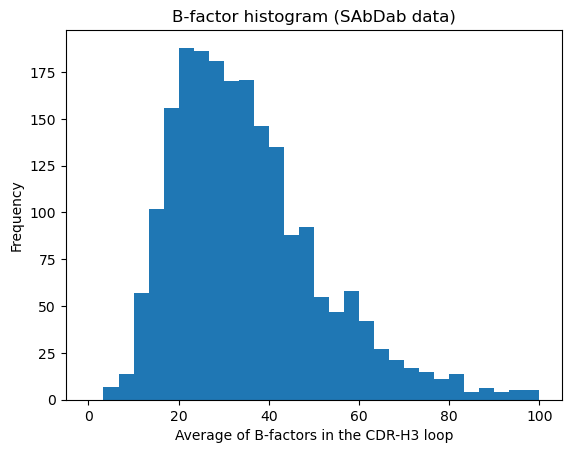

In [245]:
plt.hist([b_factor for b_factor in b_factors if b_factor != 0], 30, range=[0, 100])
plt.xlabel('Average of B-factors in the CDR-H3 loop')
plt.ylabel('Frequency')
plt.title('B-factor histogram (SAbDab data)')
plt.show()
plt.show()

In [246]:
germline = df[df.apply(lambda x: x.astype('string').str.contains('germline|naive| native | precursor |4yhi|1mlc', case=False).any(), axis=1)].sort_values('pdb').drop_duplicates(['pdb'])['pdb']
df.loc[germline.index]

,pdb,antigen_type,antigen_name,compound,organism,resolution
3371,1aj7,Hapten,5-(PARA-NITROPHENYL PHOSPHONATE)-PENTANOIC ACID,IMMUNOGLOBULIN 48G7 GERMLINE FAB ANTIBODY COMP...,MUS MUSCULUS; HOMO SAPIENS,2.1
2053,1mlc,protein,hen egg white lysozyme,MONOCLONAL ANTIBODY FAB D44.1 RAISED AGAINST C...,MUS MUSCULUS; GALLUS GALLUS,2.5
9570,1mrd,Hapten,INOSINE-5'-DIPHOSPHATE,"PREPARATION, CHARACTERIZATION AND CRYSTALLIZAT...",MUS MUSCULUS,2.3
9211,1mre,nucleic-acid,GUANOSINE-5'-DIPHOSPHATE,"PREPARATION, CHARACTERIZATION AND CRYSTALLIZAT...",MUS MUSCULUS,2.3
1264,1mrf,nucleic-acid,2'-DEOXYINOSINE-5'-MONOPHOSPHATE,"PREPARATION, CHARACTERIZATION AND CRYSTALLIZAT...",MUS MUSCULUS,2.4
11133,1n7m,Hapten,N-METHYLMESOPORPHYRIN,Germline 7G12 with N-methylmesoporphyrin,"MUS MUSCULUS, HOMO SAPIENS",1.8
3601,1ngx,Hapten,JEFFAMINE,Chimeric Germline Fab 7g12 with jeffamine frag...,"MUS MUSCULUS, HOMO SAPIENS",1.8
5053,1xfp,protein,lysozyme c,Crystal structure of the CDR2 germline reversi...,CAMELUS DROMEDARIUS; GALLUS GALLUS,1.5
11603,2a6i,peptide,dodecapeptide,Crystal structure analysis of the anti-arsonat...,MUS MUSCULUS; SYNTHETIC CONSTRUCT,2.5
7125,2ibz,protein,ubiquinol-cytochrome c reductase iron-sulfursu...,Yeast Cytochrome BC1 Complex with Stigmatellin,MUS MUSCULUS; SACCHAROMYCES CEREVISIAE,2.3


In [247]:
matured = df[df.apply(lambda x: x.astype('string').str.contains(' matur| high aff|1kel|1p2c|4fab|1gaf|4yho|4nj9', case=False).any(), axis=1) & ~df.apply(lambda x: x.astype('string').str.contains('1aj7|1d6v|2j6e|7ugo|germline|mature vir|vir mat', case=False).any(), axis=1)].sort_values('pdb').drop_duplicates(['pdb'])['pdb']
df.loc[matured.index]

,pdb,antigen_type,antigen_name,compound,organism,resolution
5987,1cz8,protein,vascular endothelial growth factor,VASCULAR ENDOTHELIAL GROWTH FACTOR IN COMPLEX ...,HOMO SAPIENS; MUS MUSCULUS,2.4
13159,1gaf,Hapten,5-(PARA-NITROPHENYL PHOSPHONATE)-PENTANOIC ACID,48G7 HYBRIDOMA LINE FAB COMPLEXED WITH HAPTEN ...,HOMO SAPIENS,1.95
8085,1kel,Hapten,?,CATALYTIC ANTIBODY 28B4 FAB FRAGMENT COMPLEXED...,MUS MUSCULUS,1.9
5810,1p2c,protein,lysozyme c,crystal structure analysis of an anti-lysozyme...,MUS MUSCULUS; GALLUS GALLUS,2.0
10370,2p4a,protein,ribonuclease pancreatic,X-ray structure of a camelid affinity matured ...,CAMELUS DROMEDARIUS; BOS TAURUS,1.9
2933,3t3p,protein,integrin alpha-iib,A Novel High Affinity Integrin alphaIIbbeta3 R...,HOMO SAPIENS; MUS MUSCULUS,2.2
7330,4nj9,Hapten,"8-methoxypyrene-1,3,6-trisulfonic acid",Crystal structure of Fab 8B10 in complex with ...,MUS MUSCULUS,1.95
1509,4yho,Hapten,N-[(2-{[(4-carbamimidoylphenyl)amino]methyl}-1...,Reversal Agent for Dabigatran,HOMO SAPIENS,1.82
2716,6cbv,protein,bril,Crystal strutcure of BRIL bound to an affinity...,HOMO SAPIENS; ESCHERICHIA COLI,1.872
731,7wg3,protein,il17rb protein,Structural basis of interleukin-17B receptor i...,Bos taurus; Mus musculus,2.19


In [248]:
b_factors_naive = b_factor_calculator(germline) 
b_factors_matured = b_factor_calculator(matured) 

Your selection: 1aj7_CDR-H3
sum of B factors: 1595.970006942749
number of atoms: 56
average B of '1aj7_CDR-H3': 28.499464409691946

Your selection: 1mlc_CDR-H3
sum of B factors: 801.0899991989136
number of atoms: 52
average B of '1mlc_CDR-H3': 15.405576907671415

Your selection: 1mrd_CDR-H3
sum of B factors: 2932.2399940490723
number of atoms: 66
average B of '1mrd_CDR-H3': 44.42787869771322

Your selection: 1mre_CDR-H3
sum of B factors: 2270.619994163513
number of atoms: 66
average B of '1mre_CDR-H3': 34.40333324490172

Your selection: 1mrf_CDR-H3
sum of B factors: 2274.439995765686
number of atoms: 66
average B of '1mrf_CDR-H3': 34.461212057055846

Your selection: 1n7m_CDR-H3
sum of B factors: 1198.8800010681152
number of atoms: 45
average B of '1n7m_CDR-H3': 26.641777801513673

Your selection: 1ngx_CDR-H3
sum of B factors: 1521.2900085449219
number of atoms: 45
average B of '1ngx_CDR-H3': 33.8064446343316

Your selection: 1xfp_CDR-H3
sum of B factors: 3875.2800092697144
number of at

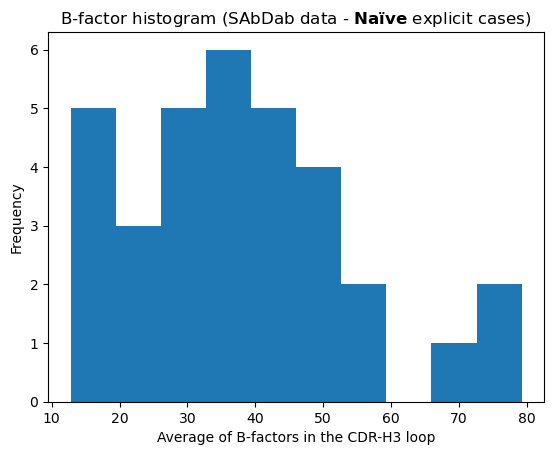

In [249]:
plt.hist([b_factor for b_factor in b_factors_naive if b_factor != 0])
plt.xlabel('Average of B-factors in the CDR-H3 loop')
plt.ylabel('Frequency')
plt.title('B-factor histogram (SAbDab data - $\\bf{Naïve}$ explicit cases)')
plt.show()
plt.show()

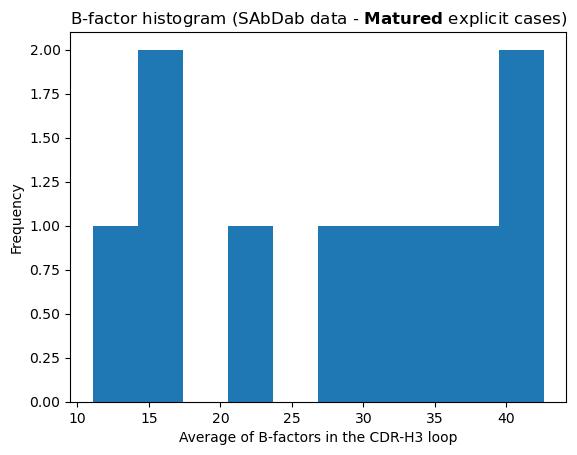

In [250]:
plt.hist([b_factor for b_factor in b_factors_matured if b_factor != 0])
plt.xlabel('Average of B-factors in the CDR-H3 loop')
plt.ylabel('Frequency')
plt.title('B-factor histogram (SAbDab data - $\\bf{Matured}$ explicit cases)')
plt.show()
plt.show()

In [251]:
np.mean([b_factor for b_factor in b_factors_naive if b_factor > 0])

37.56344435912944

In [252]:
np.mean([b_factor for b_factor in b_factors_matured if b_factor > 0])

28.08443404465776